In [23]:
import spacy
from itertools import chain, combinations, repeat
import pandas as pd
import numpy as np
import string
import json
import re
pd.set_option('display.max_rows', 1000)


# Spacy language model setting
nlp = spacy.load('en_core_web_sm')

# Target directory
DIR = "OtherLists/"

# Load from:
org_raw_file = DIR + 'organisations_only.txt'
org_ready_file = DIR + 'organisations_only_ready.json'

def save_as_json(path, data):
    with open(path, "w") as f:
        json.dump(data, f, indent=4)
        
orgs_raw = open(org_raw_file, "r").readlines()
orgs = [phrase.rstrip() for phrase in set(orgs_raw)]

print("Nr of all  organisation names:", len(orgs_raw))
print("Nr of uniq organisation names:", len(orgs))
orgs = [org for org in orgs if len(org) > 1]
orgs_lowr = [org.lower() for org in orgs if len(org) > 1]
ODF = pd.DataFrame(orgs, columns=["orgs"], dtype='str')
ODFl = pd.DataFrame(orgs_lowr, columns=["orgs"], dtype='str')

# Get spaCy tags for phrases
def get_spacy_tags(s):
    lemma = []
    pos = []
    tag = []
    ent_type = []
    for doc in nlp.pipe(s.astype('unicode').values, batch_size=50, n_threads=4):
        if doc.is_parsed:
            lemma_seq = " ".join([n.lemma_ for n in doc])
            tag_seq = " ".join([n.tag_ for n in doc])
            pos_seq = " ".join([n.pos_ for n in doc])
            ent_seq = " ".join([n.ent_type_ for n in doc])

            lemma.append(lemma_seq)
            pos.append(tag_seq)
            tag.append(pos_seq)
            ent_type.append(ent_seq)
        else:
            lemma.append(None)
            pos.append(None)
            tag.append(None)
            ent_type.append(None)
    return lemma, pos, tag, ent_type

# Spacy tags for both; original and lower() strings
lemma, pos, tag, ent_type = get_spacy_tags(ODF.orgs)
lemma_l, pos_l, tag_l, ent_type_l = get_spacy_tags(ODFl.orgs)

ODF['lemma'] = lemma
ODF['pos'] = pos
ODF['posl'] = pos_l
ODF['tag'] = tag
ODF['tagl'] = tag_l
ODF['ent_type'] = ent_type
ODF['ent_type_l'] = ent_type_l

ODF

Nr of all  organisation names: 1385
Nr of uniq organisation names: 933


,orgs,lemma,pos,posl,tag,tagl,ent_type,ent_type_l
0,Houston Psychological Association,houston psychological association,NNP NNP NNP,VB JJ NN,PROPN PROPN PROPN,VERB ADJ NOUN,ORG ORG ORG,
1,Royal Asiatic Society Korea Branch,royal asiatic society korea branch,NNP NNP NNP NNP NNP,JJ JJ NN NN NN,PROPN PROPN PROPN PROPN PROPN,ADJ ADJ NOUN NOUN NOUN,ORG ORG ORG ORG ORG,
2,The Casimir Pulaski Foundation,the casimir pulaski foundation,DT NNP NNP NNP,DT NN NN NN,DET PROPN PROPN PROPN,DET NOUN NOUN NOUN,ORG ORG ORG ORG,
3,Foreign Service Institute,foreign service institute,NNP NNP NNP,JJ NN NN,PROPN PROPN PROPN,ADJ NOUN NOUN,ORG ORG ORG,
4,Astrobiology Society of Britain,astrobiology society of britain,NNP NNP IN NNP,NN NN IN NN,PROPN PROPN ADP PROPN,NOUN NOUN ADP NOUN,GPE,
5,European Council on Foreign Relations,european council on foreign relations,NNP NNP IN NNP NNPS,JJ NN IN JJ NNS,PROPN PROPN ADP PROPN PROPN,ADJ NOUN ADP ADJ NOUN,ORG ORG ORG ORG ORG,
6,Association for Tourism in Higher Education,association for tourism in higher education,NN IN NNP IN NNP NNP,NN IN NN IN JJR NN,NOUN ADP PROPN ADP PROPN PROPN,NOUN ADP NOUN ADP ADJ NOUN,,
7,China Center for International Economic Exchanges,china center for international economic exchange,NNP NNP IN NNP NNP NNS,NN NN IN JJ JJ NNS,PROPN PROPN ADP PROPN PROPN NOUN,NOUN NOUN ADP ADJ ADJ NOUN,GPE ORG ORG ORG ORG ORG,GPE
8,"Society of Mathematicians, Physicists and Astr...","society of mathematicians , physicists and ast...","NN IN NNPS , NNPS CC NNPS IN NNP","NN IN NNS , NNS CC NNS IN NN",NOUN ADP PROPN PUNCT PROPN CCONJ PROPN ADP PROPN,NOUN ADP NOUN PUNCT NOUN CCONJ NOUN ADP NOUN,ORG ORG ORG ORG ORG ORG ORG ORG GPE,
9,British Association for International & Compar...,british association for international & compar...,NNP NNP IN NNP CC NNP NNP,JJ NN IN JJ CC JJ NN,PROPN PROPN ADP PROPN CCONJ PROPN PROPN,ADJ NOUN ADP ADJ CCONJ ADJ NOUN,ORG ORG ORG ORG ORG ORG ORG,NORP


In [24]:
DF = ODF.copy(deep=True)

In [77]:
# Identifying most common organisation name structures by 
# -POS (part of speech), and it's lower, uniques
# -TAG (by a spaCys tag), and it's lower, uniques

def display_table(table_copy, table_name):
    return table_copy.groupby(table_name).size().reset_index(name='count').sort_values('count', ascending=False)

def table_info(table_copy, table_name):
    print("Nr of unique {:5} phrases: {:<10}".format(table_name, len(set(table_copy[table_name])) ))

print("Nr of all of the phrases: {:5}".format(len(ODF['pos']) ))
display_tables = []
tables = ['pos', 'tag', 'posl', 'tagl']
for table_name in tables:
    table_copy = ODF.copy(deep=True)
    table_info(table_copy, table_name)
    show_table = display_table(table_copy, table_name)
    display_tables.append(show_table)
    
from itertools import accumulate
disp_size = 20
cumulatives = []
for table in display_tables:
    table['cumulative'] = list(accumulate(table['count']))
    display(table.head(disp_size))
    cumulatives.append(table['cumulative'].tolist())


Nr of all of the phrases:   932
Nr of unique pos   phrases: 264       
Nr of unique tag   phrases: 208       
Nr of unique posl  phrases: 334       
Nr of unique tagl  phrases: 247       


,pos,count,cumulative
212,NNP NNP NNP,197,197
165,NNP NNP IN NNP,64,261
138,NNP NNP,61,322
184,NNP NNP IN NNP NNP,40,362
228,NNP NNP NNP NNP,39,401
192,NNP NNP IN NNP NNPS,33,434
201,NNP NNP IN NNPS,19,453
70,NN IN NNP NNP,13,466
97,NNP,13,479
126,NNP IN NNP NNPS,12,491


,tag,count,cumulative
167,PROPN PROPN PROPN,201,201
134,PROPN PROPN ADP PROPN,83,284
150,PROPN PROPN ADP PROPN PROPN,75,359
115,PROPN PROPN,61,420
179,PROPN PROPN PROPN PROPN,45,465
60,NOUN ADP PROPN PROPN,23,488
34,NOUN,15,503
144,PROPN PROPN ADP PROPN CCONJ PROPN PROPN,14,517
98,PROPN ADP PROPN PROPN,14,531
170,PROPN PROPN PROPN ADP PROPN,13,544


,posl,count,cumulative
41,JJ JJ NN,110,110
95,JJ NN IN NN,49,159
125,JJ NN NN,40,199
230,NN NN,32,231
93,JJ NN IN JJ NNS,28,259
110,JJ NN IN NNS,26,285
59,JJ NN,23,308
178,NN IN JJ NNS,21,329
88,JJ NN IN JJ NN,19,348
252,NN NN NN,18,366


,tagl,count,cumulative
5,ADJ ADJ NOUN,110,110
44,ADJ NOUN ADP NOUN,75,185
65,ADJ NOUN NOUN,50,235
31,ADJ NOUN ADP ADJ NOUN,47,282
173,NOUN NOUN,37,319
130,NOUN ADP ADJ NOUN,33,352
191,NOUN NOUN NOUN,24,376
24,ADJ NOUN,24,400
14,ADJ ADJ NOUN NOUN,22,422
114,NOUN,20,442


In [96]:
syntax_taken = pd.DataFrame(cumulatives, dtype='int64')
syntax_taken = syntax_taken.T
syntax_taken.columns=tables
syntax_taken.index +=1
syntax_taken = syntax_taken[:200].astype('int64')
syntax_taken.index.name= "Synthaxes taken:"
display(syntax_taken)

,pos,tag,posl,tagl
Synthaxes taken:,,,,
1,197,201,110,110
2,261,284,159,185
3,322,359,199,235
4,362,420,231,282
5,401,465,259,319
6,434,488,285,352
7,453,503,308,376
8,466,517,329,400
9,479,531,348,422


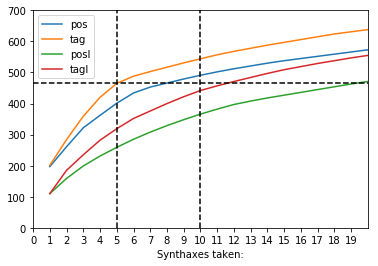

In [146]:
import matplotlib as plt
lines = syntax_taken.plot.line()
lines.set_xlim(0, 20)
lines.set_ylim(0, 700)
start, end = lines.get_xlim()
lines.xaxis.set_ticks(np.arange(start, end, 1))
lines.axvline(x=10, color='k', linestyle='--')
lines.axvline(x=5, color='k', linestyle='--')
lines.axhline(y=(len(set(ODF.orgs))/2), color='k', linestyle='--')

lines

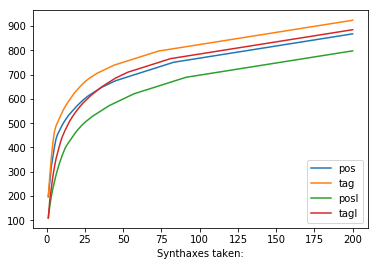

In [117]:
# Same, bigger
blines = syntax_taken.plot.line()
blines

In [26]:
# Examples of most common structures
examples = ODF.copy(deep=True)

# New columns - structure occurences (by POS, TAG, and it's lowercased forms)
examples['pos_c'] = examples.groupby(["pos"])["orgs"].transform("count")
examples['tag_c'] = examples.groupby(["tag"])["orgs"].transform("count")
examples['posl_c'] = examples.groupby(["posl"])["orgs"].transform("count")
examples['tagl_c'] = examples.groupby(["tagl"])["orgs"].transform("count")
examples = examples.sort_values('pos_c', ascending=False).reset_index(drop=True)
examples

,orgs,lemma,pos,posl,tag,tagl,ent_type,ent_type_l,pos_c,tag_c,posl_c,tagl_c
0,Houston Psychological Association,houston psychological association,NNP NNP NNP,VB JJ NN,PROPN PROPN PROPN,VERB ADJ NOUN,ORG ORG ORG,,197,201,10,12
1,Belgian Psychological Association,belgian psychological association,NNP NNP NNP,JJ JJ NN,PROPN PROPN PROPN,ADJ ADJ NOUN,ORG ORG ORG,,197,201,110,110
2,Gregor Mendel Institute,gregor mendel institute,NNP NNP NNP,NN NN NN,PROPN PROPN PROPN,NOUN NOUN NOUN,PERSON PERSON PERSON,,197,201,18,24
3,American Mathematical Society,american mathematical society,NNP NNP NNP,JJ JJ NN,PROPN PROPN PROPN,ADJ ADJ NOUN,ORG ORG ORG,NORP,197,201,110,110
4,Union Académique Internationale,union académique internationale,NNP NNP NNP,NN RB NN,PROPN PROPN PROPN,NOUN ADV NOUN,ORG ORG ORG,,197,201,1,1
5,Israel Mathematical Union,israel mathematical union,NNP NNP NNP,JJ JJ NN,PROPN PROPN PROPN,ADJ ADJ NOUN,GPE GPE GPE,,197,201,110,110
6,National Geographic Society,national geographic society,NNP NNP NNP,JJ JJ NN,PROPN PROPN PROPN,ADJ ADJ NOUN,ORG ORG ORG,,197,201,110,110
7,Nepal Mathematical Society,nepal mathematical society,NNP NNP NNP,JJ JJ NN,PROPN PROPN PROPN,ADJ ADJ NOUN,,,197,201,110,110
8,Bruno Leoni Institute,bruno leoni institute,NNP NNP NNP,VB NN NN,PROPN PROPN PROPN,VERB NOUN NOUN,PERSON PERSON PERSON,,197,201,3,8
9,Konrad Adenauer Foundation,konrad adenauer foundation,NNP NNP NNP,JJ NN NN,PROPN PROPN PROPN,ADJ NOUN NOUN,ORG ORG ORG,,197,201,40,50


In [27]:
# Groupping org names by structure (starting with most common)

def display_grouped(grouping_col, display_size, table):
    display(table.head(2))
    examp_grps = table.copy(deep=True)
    examp_grps = examp_grps[['orgs', grouping_col.name, 'pos_c', 'posl_c', 'tag_c', 'tagl_c']]
    example_dfs = []
    for val in grouping_col.unique().tolist():
        example_dfs.append(examp_grps[grouping_col == val])
    print("Grouped:")
    for example_df in example_dfs:
        display(example_df.head(display_size))

# Names grupped by POS
display_size = 5
grouping_col = examples.pos

display_grouped(grouping_col, display_size, examples)

,orgs,lemma,pos,posl,tag,tagl,ent_type,ent_type_l,pos_c,tag_c,posl_c,tagl_c
0,Houston Psychological Association,houston psychological association,NNP NNP NNP,VB JJ NN,PROPN PROPN PROPN,VERB ADJ NOUN,ORG ORG ORG,,197,201,10,12
1,Belgian Psychological Association,belgian psychological association,NNP NNP NNP,JJ JJ NN,PROPN PROPN PROPN,ADJ ADJ NOUN,ORG ORG ORG,,197,201,110,110


Grouped:


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
0,Houston Psychological Association,NNP NNP NNP,197,10,201,12
1,Belgian Psychological Association,NNP NNP NNP,197,110,201,110
2,Gregor Mendel Institute,NNP NNP NNP,197,18,201,24
3,American Mathematical Society,NNP NNP NNP,197,110,201,110
4,Union Académique Internationale,NNP NNP NNP,197,1,201,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
197,Conference Board of Canada,NNP NNP IN NNP,64,4,83,8
198,Royal Society of Queensland,NNP NNP IN NNP,64,49,83,75
199,Physical Society of Japan,NNP NNP IN NNP,64,49,83,75
200,Anthropological Society of Victoria,NNP NNP IN NNP,64,26,83,75
201,British Society of Criminology,NNP NNP IN NNP,64,49,83,75


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
261,Australia Institute,NNP NNP,61,32,61,37
262,Conférence Olivaint,NNP NNP,61,32,61,37
263,Kerala State,NNP NNP,61,4,61,8
264,CIDOB Foundation,NNP NNP,61,32,61,37
265,Copenhagen Institute,NNP NNP,61,32,61,37


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
322,International Association of Mathematical Physics,NNP NNP IN NNP NNP,40,19,75,47
323,Taiwan Institute of Economic Research,NNP NNP IN NNP NNP,40,19,75,47
324,Economic Society of South Africa,NNP NNP IN NNP NNP,40,19,75,47
325,International Union of Psychological Science,NNP NNP IN NNP NNP,40,19,75,47
326,Astronomical Society of Southern Africa,NNP NNP IN NNP NNP,40,19,75,47


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
362,Royal Philatelic Society London,NNP NNP NNP NNP,39,16,45,22
363,Royal Town Planning Institute,NNP NNP NNP NNP,39,9,45,10
364,International Strategic Research Organization,NNP NNP NNP NNP,39,16,45,22
365,San Martín National Institute,NNP NNP NNP NNP,39,1,45,1
366,Forum Minority Research Institute,NNP NNP NNP NNP,39,3,45,5


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
401,Albanian Institute for International Studies,NNP NNP IN NNP NNPS,33,28,75,47
402,Asan Institute for Policy Studies,NNP NNP IN NNP NNPS,33,9,75,13
403,American College of Medical Informatics,NNP NNP IN NNP NNPS,33,28,75,47
404,Singapore Institute of International Affairs,NNP NNP IN NNP NNPS,33,7,75,14
405,British Association for American Studies,NNP NNP IN NNP NNPS,33,28,75,47


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
434,Royal College of Pathologists,NNP NNP IN NNPS,19,26,83,75
435,Bangladesh Society of Microbiologists,NNP NNP IN NNPS,19,3,83,8
436,French Academy of Sciences,NNP NNP IN NNPS,19,26,83,75
437,Pakistan Academy of Sciences,NNP NNP IN NNPS,19,26,83,75
438,French Academy of Technologies,NNP NNP IN NNPS,19,26,83,75


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
453,Centre for Civil Society,NN IN NNP NNP,13,11,23,33
455,Society of Biblical Literature,NN IN NNP NNP,13,11,23,33
457,Society for Psychical Research,NN IN NNP NNP,13,11,23,33
458,Association for Symbolic Logic,NN IN NNP NNP,13,11,23,33
462,Association for Psychological Science,NN IN NNP NNP,13,11,23,33


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
454,TESEV,NNP,13,3,13,3
456,Kochi,NNP,13,15,13,20
459,Captus,NNP,13,15,13,20
460,Shaharit,NNP,13,1,13,1
461,India,NNP,13,1,13,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
479,Academy of Social Sciences,NNP IN NNP NNPS,12,21,14,33
480,Institute of Professional Psychologists,NNP IN NNP NNPS,12,21,14,33
481,Institute of Strategic Studies,NNP IN NNP NNPS,12,21,14,33
482,Institute for Security Studies,NNP IN NNP NNPS,12,9,14,15
483,Society of Exploration Geophysicists,NNP IN NNP NNPS,12,9,14,15


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
491,OneEurope,NN,11,15,15,20
492,Tasc,NN,11,3,15,3
493,CITEFA,NN,11,15,15,20
494,SAFA,NN,11,1,15,1
495,Eudoxa,NN,11,15,15,20


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
502,Centre for Independent Studies,NN IN NNP NNPS,10,21,23,33
503,Association for Democratic Reforms,NN IN NNP NNPS,10,21,23,33
504,Association of Social Anthropologists,NN IN NNP NNPS,10,21,23,33
505,Association for Psychosocial Studies,NN IN NNP NNPS,10,21,23,33
506,Association for Asian Studies,NN IN NNP NNPS,10,21,23,33


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
512,Bonn International Center for Conversion,NNP NNP NNP IN NNP,9,1,13,1
514,Royal Historical Society of Victoria,NNP NNP NNP IN NNP,9,4,13,9
516,Royal Astronomical Society of Canada,NNP NNP NNP IN NNP,9,5,13,9
517,State Information Center of China,NNP NNP NNP IN NNP,9,1,13,1
518,Royal Historical Society of Queensland,NNP NNP NNP IN NNP,9,5,13,9


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
513,Indonesian Mathematical Society,JJ NNP NNP,9,110,9,110
515,Iranian Mathematical Society,JJ NNP NNP,9,110,9,110
521,Turkish Mathematical Society,JJ NNP NNP,9,110,9,110
522,Portuguese Mathematical Society,JJ NNP NNP,9,110,9,110
523,British Thoracic Society,JJ NNP NNP,9,110,9,110


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
530,German Institute of Global and Area Studies,NNP NNP IN NNP CC NNP NNPS,8,2,14,2
531,Bangladesh Institute of Law and International ...,NNP NNP IN NNP CC NNP NNPS,8,1,14,1
532,German Institute for International and Securit...,NNP NNP IN NNP CC NNP NNPS,8,2,14,2
533,Georgian Foundation for Strategic and Internat...,NNP NNP IN NNP CC NNP NNPS,8,3,14,6
534,International Union for Prehistoric and Protoh...,NNP NNP IN NNP CC NNP NNPS,8,3,14,6


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
538,The Kosciuszko Institute,DT NNP NNP,7,3,9,5
544,The Takshashila Institution,DT NNP NNP,7,4,9,5
551,The Heraldry Society,DT NNP NNP,7,3,9,5
552,The Physiological Society,DT NNP NNP,7,4,9,5
557,The Mammal Society,DT NNP NNP,7,4,9,5


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
539,Selden Society,NNP NN,7,23,7,24
540,Matica srpska,NNP NN,7,1,7,1
545,Royal Institution,NNP NN,7,23,7,24
547,Sahitya Akademi,NNP NN,7,1,7,1
548,Royal Society,NNP NN,7,23,7,24


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
541,German Advisory Council on Global Change,NNP NNP NNP IN NNP NNP,7,3,11,4
543,Geneva International Centre for Humanitarian D...,NNP NNP NNP IN NNP NNP,7,2,11,2
560,Royal Asiatic Society of Sri Lanka,NNP NNP NNP IN NNP NNP,7,1,11,2
564,Karl Jaspers Society of North America,NNP NNP NNP IN NNP NNP,7,1,11,3
567,Royal Numismatic Society of New Zealand,NNP NNP NNP IN NNP NNP,7,3,11,4


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
542,Royal Australasian Ornithologists Union,JJ NNP NNP NNP,7,5,10,22
550,Australian Strategic Policy Institute,JJ NNP NNP NNP,7,16,10,22
554,South African Mathematical Society,JJ NNP NNP NNP,7,9,10,9
555,South African Archaeological Society,JJ NNP NNP NNP,7,9,10,9
558,Royal Australian Historical Society,JJ NNP NNP NNP,7,9,10,9


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
546,Social Policy and Development Center,NNP NNP CC NNP NNP,7,5,9,6
549,International Literature and Psychology Confer...,NNP NNP CC NNP NNP,7,5,9,6
553,Human Behavior and Evolution Society,NNP NNP CC NNP NNP,7,5,9,6
556,Bangladesh Education and Research Network,NNP NNP CC NNP NNP,7,1,9,1
559,European Brain and Behaviour Society,NNP NNP CC NNP NNP,7,5,9,6


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
573,Bavarian Academy of Sciences and Humanities,NNP NNP IN NNPS CC NNS,6,8,9,13
580,Göttingen Academy of Sciences and Humanities,NNP NNP IN NNPS CC NNS,6,2,9,2
582,Saxonian Academy of Sciences and Humanities,NNP NNP IN NNPS CC NNS,6,8,9,13
587,Serbian Academy of Sciences and Arts,NNP NNP IN NNPS CC NNS,6,8,9,13
594,European Academy of Sciences and Arts,NNP NNP IN NNPS CC NNS,6,8,9,13


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
574,Society for Medieval Feminist Scholarship,NN IN NNP NNP NNP,6,4,7,5
576,Association for Contextual Behavioral Science,NN IN NNP NNP NNP,6,4,7,5
579,Centre for Fair Political Analysis,NN IN NNP NNP NNP,6,4,7,5
581,Association for Behavior Analysis International,NN IN NNP NNP NNP,6,1,7,1
584,Centre for International Governance Innovation,NN IN NNP NNP NNP,6,4,7,6


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
575,European Association for Theoretical Computer ...,NNP NNP IN NNP NNP NNP,6,3,10,6
578,Mathematical Society of South Eastern Europe,NNP NNP IN NNP NNP NNP,6,1,10,3
586,Linnean Society of New South Wales,NNP NNP IN NNP NNP NNP,6,2,10,3
588,Royal Society of New South Wales,NNP NNP IN NNP NNP NNP,6,2,10,3
589,Egmont Group of Financial Intelligence Units,NNP NNP IN NNP NNP NNP,6,3,10,6


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
577,Royal College of Paediatrics and Child Health,NNP NNP IN NNP CC NNP NNP,6,1,14,2
583,American Academy of Child and Adolescent Psych...,NNP NNP IN NNP CC NNP NNP,6,2,14,5
585,British Association for Behavioural and Cognit...,NNP NNP IN NNP CC NNP NNP,6,3,14,6
590,Bangladesh Institute of Peace & Security Studies,NNP NNP IN NNP CC NNP NNP,6,1,14,1
591,International Union of Pure and Applied Chemistry,NNP NNP IN NNP CC NNP NNP,6,1,14,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
597,Australasian Law Teachers Association,NNP NNP NNPS NNP,5,1,45,10
603,Argentine Film Critics Association,NNP NNP NNPS NNP,5,1,45,5
604,Austronesian Formal Linguistics Association,NNP NNP NNPS NNP,5,5,45,22
605,United States Studies Centre,NNP NNP NNPS NNP,5,1,45,1
607,British International Studies Association,NNP NNP NNPS NNP,5,5,45,22


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
598,Society of Actuaries,NNP IN NNP,5,4,5,10
599,Institute of Physics,NNP IN NNP,5,5,5,10
600,Institute of Economics,NNP IN NNP,5,4,5,10
601,Institut de France,NNP IN NNP,5,1,5,1
609,Académie de Marine,NNP IN NNP,5,1,5,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
602,Society for Ethnomusicology,NN IN NNP,5,5,7,10
606,Military of Argentina,NN IN NNP,5,5,7,10
608,Society for Endocrinology,NN IN NNP,5,5,7,10
610,Club of Rome,NN IN NNP,5,5,7,10
611,Club of Budapest,NN IN NNP,5,1,7,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
612,Political Studies Association,NNP NNPS NNP,4,9,201,50
636,Development Studies Association,NNP NNPS NNP,4,4,201,24
643,Regional Studies Association,NNP NNPS NNP,4,9,201,50
647,National Academies Forum,NNP NNPS NNP,4,9,201,50


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
613,Comisión Nacional de Actividades Espaciales,NNP NNP NNP NNP NNP,4,1,4,1
620,Royal Asiatic Society Korea Branch,NNP NNP NNP NNP NNP,4,1,4,1
632,Massachusetts General Hospital Psychiatry Academy,NNP NNP NNP NNP NNP,4,1,4,1
641,Stockholm International Peace Research Institute,NNP NNP NNP NNP NNP,4,1,4,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
614,American Academy of Arts and Sciences,NNP NNP IN NNPS CC NNPS,4,8,7,13
625,Argentine Association of Translators and Inter...,NNP NNP IN NNPS CC NNPS,4,2,7,2
637,International Council on Monuments and Sites,NNP NNP IN NNPS CC NNPS,4,8,7,13
644,Connecticut Academy of Arts and Sciences,NNP NNP IN NNPS CC NNPS,4,8,7,13


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
615,Association for Transpersonal Psychology,NN IN NNP NN,4,11,7,33
619,Society for Risk Analysis,NN IN NNP NN,4,6,7,15
627,Centre for Conflict Resolution,NN IN NNP NN,4,6,7,15
628,Center for Free Enterprise,NN IN NNP NN,4,11,7,33


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
616,Gracques,NNS,4,5,15,20
617,FAES,NNS,4,5,15,20
622,Liberales,NNS,4,5,15,20
634,DCAF,NNS,4,5,15,20


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
618,Institute of Real Estate Management,NNP IN NNP NNP NNP,4,4,6,6
626,Institute of Applied Economic Research,NNP IN NNP NNP NNP,4,1,6,1
630,Council for Hospitality Management Education,NNP IN NNP NNP NNP,4,1,6,1
646,Instituto de Pensamiento Estratégico Ágora,NNP IN NNP NNP NNP,4,1,6,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
621,European Union Institute for Security Studies,NNP NNP NNP IN NNP NNPS,4,1,11,2
623,South African Institute of International Affairs,NNP NNP NNP IN NNP NNPS,4,1,11,4
633,S. Rajaratnam School of International Studies,NNP NNP NNP IN NNP NNPS,4,1,11,1
638,Royal Swedish Academy of Engineering Sciences,NNP NNP NNP IN NNP NNPS,4,1,11,2


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
624,Spanish Royal Academy of Sciences,NNP NNP NNP IN NNPS,4,4,13,9
629,Royal Swedish Academy of Sciences,NNP NNP NNP IN NNPS,4,4,13,9
639,Royal Bohemian Society of Sciences,NNP NNP NNP IN NNPS,4,4,13,9
642,Polish Copernicus Society of Naturalists,NNP NNP NNP IN NNPS,4,1,13,2


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
631,International Society for Comparative Psychology,NNP NNP IN NNP NN,4,19,6,47
635,American Society of Church History,NNP NNP IN NNP NN,4,3,6,13
640,International Association of Applied Psychology,NNP NNP IN NNP NN,4,1,6,4
645,Netherlands Institute for Multiparty Democracy,NNP NNP IN NNP NN,4,2,6,7


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
648,German Academy of Science and Engineering,NNP NNP IN NNP CC NNP,3,4,7,13
656,Swedish Society for Anthropology and Geography,NNP NNP IN NNP CC NNP,3,4,7,13
672,International Institute for Research and Educa...,NNP NNP IN NNP CC NNP,3,4,7,13


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
649,European Federation of National Engineering As...,NNP NNP IN NNP NNP NNPS,3,3,10,6
665,American Society of Questioned Document Examiners,NNP NNP IN NNP NNP NNPS,3,1,10,1
670,International Centre for Black Sea Studies,NNP NNP IN NNP NNP NNPS,3,3,10,6


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
650,Association of Law Teachers,NN IN NNP NNS,3,9,7,15
655,Association of Art Historians,NN IN NNP NNS,3,9,7,15
666,Association of German Engineers,NN IN NNP NNS,3,21,7,33


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
651,Institute of IT Professionals,NNP IN NNP NNS,3,1,4,1
653,Institute of Developing Economies,NNP IN NNP NNS,3,2,4,4
674,Academy for Eating Disorders,NNP IN NNP NNS,3,2,4,4


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
652,Macdonald-Laurier Institute,NNP HYPH NNP NNP,3,3,3,3
667,North-South Institute,NNP HYPH NNP NNP,3,3,3,3
671,Saint-Simon Foundation,NNP HYPH NNP NNP,3,3,3,3


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
654,Institute for US and Canadian Studies,NNP IN NNP CC NNP NNPS,3,1,4,1
663,Institute of International and European Affairs,NNP IN NNP CC NNP NNPS,3,4,4,5
664,Institute for Democracy and Economic Affairs,NNP IN NNP CC NNP NNPS,3,1,4,4


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
657,Erwin Schrödinger International Institute for ...,NNP NNP NNP NNP IN NNP NNP,3,1,4,1
661,Middle East Studies Association of North America,NNP NNP NNP NNP IN NNP NNP,3,1,4,1
673,Lee Kuan Yew School of Public Policy,NNP NNP NNP NNP IN NNP NNP,3,1,4,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
658,Society for Industrial and Applied Mathematics,NN IN NNP CC NNP NNP,3,1,5,1
660,Centre of Planning and Economic Research,NN IN NNP CC NNP NNP,3,2,5,4
662,Society for Medieval and Renaissance Philosophy,NN IN NNP CC NNP NNP,3,1,5,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
659,Institute for Research on Public Policy,NNP IN NNP IN NNP NNP,3,1,3,4
668,Society for Research in Child Development,NNP IN NNP IN NNP NNP,3,2,3,2
669,Society for Research into Higher Education,NNP IN NNP IN NNP NNP,3,2,3,4


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
675,Accademia della Crusca,NNP NN NNP,2,1,2,8
706,Finnish Literature Society,NNP NN NNP,2,40,2,50


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
676,The Casimir Pulaski Foundation,DT NNP NNP NNP,2,2,2,2
729,The Lion Rock Institute,DT NNP NNP NNP,2,2,2,2


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
677,International Society of Political Psychology,NNP NNP IN JJ NN,2,19,3,47
691,Australasian Society for Experimental Psychology,NNP NNP IN JJ NN,2,19,3,47


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
678,Académie des Beaux-Arts,NNP NNP NNP HYPH NNP,2,1,2,1
716,New Economic School – Georgia,NNP NNP NNP HYPH NNP,2,1,2,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
679,Circolo Matematico di Palermo,NNP NNP FW NNP,2,1,2,1
682,Academia Nacional de Medicina,NNP NNP FW NNP,2,1,2,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
680,Ratio Institute,NN NNP,2,32,3,37
734,Academia Sinica,NN NNP,2,32,3,37


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
681,Society for the Promotion of Hellenic Studies,NN IN DT NNP IN NNP NNPS,2,2,3,4
695,Society for the Promotion of Roman Studies,NN IN DT NNP IN NNP NNPS,2,2,3,4


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
683,Royal Academy of Jurisprudence and Legislation,NNP NNP IN NNP CC NN,2,4,9,13
719,Chartered Institution of Highways and Transpor...,NNP NNP IN NNP CC NN,2,1,9,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
684,Brazilian Society of Physiology,JJ NNP IN NNP,2,49,3,75
711,Societat Catalana de Matemàtiques,JJ NNP IN NNP,2,1,3,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
685,American Psychiatric Nurses Association,JJ NNP NNPS NNP,2,5,10,22
727,Latin American Studies Association,JJ NNP NNPS NNP,2,5,10,22


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
686,Association for Tourism in Higher Education,NN IN NNP IN NNP NNP,2,2,3,4
692,Association for Advancement of Behavior Therapy,NN IN NNP IN NNP NNP,2,2,3,2


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
687,International Society of Critical Health Psych...,NNP NNP IN NNP NNP NN,2,3,3,6
728,European Academy of Occupational Health Psycho...,NNP NNP IN NNP NNP NN,2,3,3,6


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
688,Royal Asiatic Society of Great Britain and Ire...,NNP NNP NNP IN NNP NNP CC NNP,2,2,2,2
740,Royal Anthropological Institute of Great Brita...,NNP NNP NNP IN NNP NNP CC NNP,2,2,2,2


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
689,Centre for European Policy,NN IN JJ NNP,2,11,5,33
703,Center for European Renewal,NN IN JJ NNP,2,11,5,33


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
690,Taiwan Foundation for Democracy,NNP NNP IN NN,2,1,4,1
735,Royal College of Nursing,NNP NNP IN NN,2,49,4,75


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
693,Mathematical Society of the Philippines,NNP NNP IN DT NNPS,2,2,2,2
699,Australian Academy of the Humanities,NNP NNP IN DT NNPS,2,2,2,2


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
694,Royal College of Physicians of Ireland,NNP NNP IN NNPS IN NNP,2,3,3,5
715,German Academy of Sciences at Berlin,NNP NNP IN NNPS IN NNP,2,3,3,5


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
696,Society of Antiquaries of Scotland,NNP IN NNPS IN NNP,2,2,2,2
702,Society of Antiquaries of London,NNP IN NNPS IN NNP,2,2,2,2


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
697,Human Factors and Ergonomics Society,NNP NNPS CC NNP NNP,2,1,9,6
732,Associated Counsellors & Psychologists NSW,NNP NNPS CC NNP NNP,2,1,9,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
698,Trinità dei Monti,NNP VBD NNP,2,1,2,1
738,Accademia dei Lincei,NNP VBD NNP,2,18,2,24


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
700,Institution of Engineering and Technology,NN IN NNP CC NNP,2,4,2,4
745,Center for Research and Communication,NN IN NNP CC NNP,2,4,2,4


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
701,Justice Centre for Constitutional Freedoms,NNP NNP IN NNP NNS,2,7,6,14
721,Canadian Centre for Policy Alternatives,NNP NNP IN NNP NNS,2,9,6,13


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
704,Bibliographical Society of the University of V...,NNP NNP IN DT NNP IN NNP,2,6,2,6
725,American Association for the Advancement of Sc...,NNP NNP IN DT NNP IN NNP,2,6,2,6


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
705,The Heraldry Society of New Zealand,DT NNP NNP IN NNP NNP,2,2,2,2
747,The Hague Institute for Global Justice,DT NNP NNP IN NNP NNP,2,2,2,2


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
707,Society of Polymer Science,NNP IN NNP NNP,2,6,14,15
708,Centro de Estudios Públicos,NNP IN NNP NNP,2,1,14,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
709,European Federation of Psychology Students' As...,NNP NNP IN NNP NNPS POS NNS,2,2,2,2
710,European Federation of Psychology Teachers' As...,NNP NNP IN NNP NNPS POS NNS,2,2,2,2


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
712,Society for Personality and Social Psychology,NN IN NNP CC NNP NN,2,2,2,4
743,Society for Industrial and Organizational Psyc...,NN IN NNP CC NNP NN,2,1,2,5


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
713,Institute of Chartered Accountants of Sri Lanka,NNP IN NNP NNPS IN NNP NNP,2,1,2,1
748,Society of Architectural Historians of Great B...,NNP IN NNP NNPS IN NNP NNP,2,1,2,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
714,Association of Nepalese Mathematicians in America,NN IN NNP NNPS IN NNP,2,2,2,3
744,Society for Social Studies of Science,NN IN NNP NNPS IN NNP,2,2,2,3


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
717,Canadian Society of Forensic Science,JJ NNP IN NNP NNP,2,19,3,47
736,Spanish Society of Applied Mathematics,JJ NNP IN NNP NNP,2,2,3,4


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
718,Real Academia Española,JJ NN NNP,2,40,2,50
746,Bundesakademie für Sicherheitspolitik,JJ NN NNP,2,1,2,2


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
720,Experimental Psychology Society,JJ NN NN,2,40,2,50
722,Economic History Society,JJ NN NN,2,40,2,50


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
723,Royal Society of Arts,NNP NNP IN NNS,2,26,4,75
750,Royal Academy of Arts,NNP NNP IN NNS,2,26,4,75


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
724,Union of Bulgarian Mathematicians,NN IN JJ NNPS,2,21,5,33
741,Association of American Geographers,NN IN JJ NNPS,2,21,5,33


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
726,Institute for National Security Studies,NNP IN NNP NNP NNPS,2,2,6,6
742,Institute for International Political Studies,NNP IN NNP NNP NNPS,2,1,6,5


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
730,Royal Spanish Mathematical Society,NNP JJ NNP NNP,2,9,2,9
737,Royal Dutch Mathematical Society,NNP JJ NNP NNP,2,9,2,9


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
731,International Society for Iranian Studies,NNP NNP IN JJ NNPS,2,28,2,47
739,Scandinavian Society for Iranian Studies,NNP NNP IN JJ NNPS,2,28,2,47


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
733,Society of Applied & Industrial Mathematicians,NN IN NNP CC NNP NNPS,2,4,5,5
749,Centre for Strategic and International Studies,NN IN NNP CC NNP NNPS,2,4,5,5


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
751,Federation of Associations in Behavioral & Bra...,NN IN NNPS IN NNP CC NNP NNPS,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
752,Association for Child and Adolescent Mental He...,NN IN NNP CC NNP NNP NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
753,Societas eruditorum incognitorum in terris Aus...,NNS NN NN IN JJ NNP,1,1,1,3


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
754,China Center for International Economic Exchanges,NNP NNP IN NNP NNP NNS,1,1,3,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
755,Armed Forces Law Association of New Zealand,NNP NNPS NNP NNP IN NNP NNP,1,1,4,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
756,International Institute for the Advanced Studi...,NNP NNP IN DT NNP NNPS IN NNP CC NNP NNP NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
757,International Association for Cross-Cultural P...,NNP NNP IN NNP HYPH NNP NN,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
758,"International Society for Analysis, its Applic...","NNP NNP IN NNP , PRP$ NNP CC NNP",1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
759,"Society of Mathematicians, Physicists and Astr...","NN IN NNPS , NNPS CC NNPS IN NNP",1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
760,Society of Clinical Child & Adolescent Psychology,NNP IN NNP NNP CC NNP NNP,1,1,2,2


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
761,Istituto Affari Internazionali,NN JJ NNP,1,18,1,24


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
762,Center for Strategic Studies under the Preside...,NN IN NNP NNPS IN DT NNP IN NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
763,Association for the Study of Australian Litera...,NN IN DT NNP IN NNP NNP,1,1,3,4


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
764,Issam Fares Institute for Public Policy and In...,NNP NNP NNP IN NNP NNP CC NNP NNPS,1,1,2,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
765,British Society for the History of Science,NNP NNP IN DT NN IN NN,1,6,1,6


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
766,International Society for Research on Aggression,NNP NNP IN NNP IN NN,1,2,1,5


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
767,Foraus,JJ,1,3,1,3


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
768,"Institution of Engineers, Sri Lanka","NN IN NNP , NNP NNP",1,1,2,2


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
769,Centre for Development and Enterprise,NN IN NNP CC NN,1,4,1,4


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
770,Walter Eucken Institut,NNP NNP NNS,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
771,Lakshman Kadirgamar Institute of International...,NNP NNP NNP IN NNP NNPS CC NNP NNPS,1,1,2,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
772,Society for the Study of Architecture in Canada,NN IN DT NNP IN NNP IN NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
773,Spanish Society of Statistics and Operations R...,JJ NNP IN NNPS CC NNP NNP,1,1,1,2


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
774,Society for Media Psychology and Technology,NN IN NNP NNP CC NN,1,1,1,4


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
775,Mid-Atlantic Council of Latin American Studies,NNP HYPH NNP NNP IN JJ JJ NNPS,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
776,Institut français des relations internationales,NNS NNS FW NNS NNS,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
777,Kenya Institute for Public Policy Research and...,NNP NNP IN NNP NNP NNP CC NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
778,Centre for European Policy Studies,NN IN NNP NNP NNPS,1,2,7,6


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
779,Accademia nazionale delle scienze,NNP NN NN JJ,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
780,Sport and Citizenship,NN CC NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
781,Classical Association of the Middle West and S...,NNP NNP IN DT NNP NNP CC NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
782,"North Rhine-Westphalian Academy of Sciences, H...","NNP NNP HYPH NNP NNP IN NNPS , NNPS CC DT NNS",1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
783,Society for Mathematics and Computation in Music,NN IN NNP CC NNP IN NNP,1,1,2,2


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
784,The Professional Commons,DT NNP NNPS,1,1,9,5


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
785,Institute of World Economy and International R...,NNP IN NNP NNP CC NNP NNPS,1,1,2,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
786,Berlin-Brandenburg Academy of Sciences and Hum...,NNP HYPH NNP NNP IN NNPS CC NNS,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
787,Canadian Society for the Study of Religion,JJ NNP IN DT NNP IN NNP,1,6,1,6


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
788,Centre for Policy of Legal Reforms,NN IN NNP IN NNP NNPS,1,1,3,4


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
789,Real Academia de la Historia,JJ NN IN FW NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
790,Canadian Society of Medievalists,JJ NNP IN NNPS,1,26,3,75


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
791,Groupement de recherche et d'études pour la ci...,NNP NNP NNP NNP NNS VBP JJ NN NNS,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
792,Marine Biological Association of the United Ki...,NNP NNP NNP IN DT NNP NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
793,Real Academia de Bellas Artes de San Fernando,JJ NNP IN NNP NNP IN NNP NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
794,Academia Argentina de Letras,NN NNP IN NNP,1,3,1,8


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
795,Institute for Security and Development Policy,NNP IN NNP CC NNP NNP,1,1,4,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
796,Cercle de l'Oratoire,FW FW NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
797,National Association for Research & Therapy of...,NNP NNP IN NNP CC NNP IN NNP,1,1,2,2


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
798,International Association for Mathematics and ...,NNP NNP IN NNP CC NNPS IN NNP,1,1,2,2


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
799,Academy of Counseling Psychology,NNP IN NNP NN,1,6,4,15


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
800,Anxiety and Depression Association of America,NN CC NNP NNP IN NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
801,German Academy of Sciences Leopoldina,NNP NNP IN NNPS NNP,1,1,75,13


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
802,Committee for Economic Development of Australia,NNP IN NNP NNP IN NNP,1,1,1,3


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
803,"OUPS, Open University Psychological Society","NNP , NNP NNP NNP NNP",1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
804,Archaeological and Anthropological Society of ...,JJ CC NNP NNP IN NNP,1,1,1,2


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
805,Sociedade Brasileira para o Progresso da Ciência,NNP NNP VBD XX NNP NNP NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
806,Begin-Sadat Center for Strategic Studies,VB HYPH NNP NNP IN NNP NNPS,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
807,Royal Asiatic Society Hong Kong Branch,NNP NNP NNP NNP NNP NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
808,Italian Association of Mathematics Applied to ...,NNP NNP IN NNP VBN IN NNP CC NNP NNPS,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
809,"British Kinematograph, Sound and Television So...","JJ NNP , NNP CC NNP NNP",1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
810,"Argentine Society of Plastic, Reconstructive a...","NNP NNP IN NNP , JJ CC JJ NNP",1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
811,Netherlands Institute of International Relatio...,NNP NNP IN NNP NNPS NNP,1,1,10,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
812,Société de Mathématiques Appliquées et Industr...,NNP IN NNP NNP NN NNS,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
813,Institute of Mathematics and its Applications,NNP IN NNP CC PRP$ NNS,1,1,1,4


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
814,Foundation for Iranian Studies,NNP IN JJ NNPS,1,21,1,33


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
815,Libertad y Desarrollo,NNP PRP NN,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
816,Anti-Corruption Resource Centre,RB HYPH NNP NNP NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
817,Malaysian Branch of the Royal Asiatic Society,NNP NNP IN DT NNP NNP NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
818,One Country Two Systems Research Institute,CD NNP CD NNPS NNP NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
819,Canadian Defence and Foreign Affairs Institute,JJ NNP CC NNP NNPS NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
820,Friends of Europe,NNS IN NNP,1,1,7,10


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
821,Our Hong Kong Foundation,PRP$ NNP NNP NNP,1,1,10,22


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
822,Macedonian Society Association Mathematics/Com...,NNP NNP NNP NNP SYM NNP NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
823,Deutsche Gesellschaft für auswärtige Politik,NNP NNP NN DT NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
824,Society for Occupational Health Psychology,NN IN NNP NNP NN,1,4,1,6


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
825,American Antiquarian Society,JJ JJ NNP,1,110,1,110


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
826,Research Institute of the Finnish Economy,NNP NNP IN DT NNP NN,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
827,East Asian Bureau of Economic Research,JJ NNP NNP IN NNP NNP,1,2,1,2


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
828,Archives of the History of American Psychology,NNS IN DT NN IN JJ NN,1,1,1,4


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
829,American Academy of Psychiatry and the Law,NNP NNP IN NNP CC DT NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
830,Australian and New Zealand Law and History Soc...,JJ CC NNP NNP NNP CC NN NN,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
831,"Bangladesh Association of Librarians, Informat...","NNP NNP IN NNPS , NNP NNPS CC NNS",1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
832,"Tunisian Academy of Sciences, Letters, and Arts","NNP NNP IN NNPS , NNPS , CC NNS",1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
833,International Society for the Study of Behavio...,NNP NNP IN DT NNP IN NNP NNP,1,1,2,2


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
834,Society for Art History in Switzerland,NN IN NNP NN IN NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
835,Académie des Inscriptions et Belles-Lettres,NNP NNP NNP NNP NNP HYPH NNS,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
836,Sociedad Argentina de Autores y Compositores d...,NNP NNP IN NNP PRP NNP IN NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
837,Liberales Institut,NNS NNS,1,1,2,3


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
838,Institut Choiseul for International Politics a...,NNP NNP IN NNP NNPS CC NNPS,1,1,3,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
839,Ifo Institut für Wirtschaftsforschung,NN VBZ NN NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
840,Vlaamse Volksbeweging,JJ VBG,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
841,Society for Historians of American Foreign Rel...,NN IN NNPS IN NNP NNP NNPS,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
842,Philological Society,JJ NNP,1,23,1,24


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
843,Al-Ahram Center for Political and Strategic St...,NNP HYPH NNP NNP IN JJ CC NNP NNPS,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
844,National Academy of History of Argentina,NNP NNP IN NN IN NNP,1,2,1,5


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
845,American Academy of Psychoanalysis and Dynamic...,NNP NNP IN NNP CC JJ NNP,1,2,1,5


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
846,Centre for Analysis of Strategies and Technolo...,NN IN NNP IN NNP CC NNPS,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
847,Informatics Europe,NNS NNP,1,2,3,3


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
848,College of Community Physicians of Sri Lanka,NN IN NNP NNPS IN NNP NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
849,Centre for Strategic Studies New Zealand,NN IN NNP NNP NNP NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
850,College Art Association,NN NNP NNP,1,18,1,24


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
851,Foundations of Computational Mathematics,NNS IN JJ NNPS,1,1,5,33


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
852,Brazilian Society of Health Informatics,JJ NNP IN NNP NNPS,1,9,3,13


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
853,Chung-Hua Institution for Economic Research,NNP HYPH NNP NNP IN NNP NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
854,Association for the Scientific Study of Anomal...,NN IN DT NNP NNP IN NNP NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
855,Royal Western Australian Historical Society,JJ JJ NNP NNP NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
856,Strategic and Defence Studies Centre,NNP CC NNP NNPS NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
857,Société mathématique de France,NNP NN FW NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
858,The Facilities Society,DT NNPS NNP,1,2,9,5


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
859,Think tank,VB NN,1,4,2,8


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
860,Académie des Sciences Morales et Politiques,NNP NNP NNP NNP NN NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
861,Academy of the Social Sciences in Australia,NNP IN DT NNP NNPS IN NNP,1,1,1,2


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
862,National Society of Hispanic MBAs,NNP NNP IN JJ NNS,1,28,3,47


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
863,Institute and Faculty of Actuaries,NNP CC NNP IN NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
864,Royal Zoological Society of New South Wales,NNP NNP NNP IN NNP NNP NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
865,Centre for the New Europe,NN IN DT NNP NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
866,Wiardi Beckman Stichting,NNP NNP VBG,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
867,Institute for Advanced Strategic and Political...,NNP IN JJ NNP CC NNP NNPS,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
868,Institute for Social and Economic Analyses,NNP IN NNP CC NNP NNS,1,4,1,5


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
869,European Centre of Excellence for Countering H...,NNP NNP IN NNP IN VBG NN NNS,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
870,Ludwig Boltzmann Institute for Neo-Latin Studies,NNP NNP NNP IN NNP HYPH NNP NNPS,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
871,Association for the Scientific Study of Consci...,NN IN DT NNP NNP IN NNP,1,1,1,2


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
872,British Naturalists' Association,JJ NNPS POS NN,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
873,Analytical Center for the Government of the Ru...,NNP NNP IN DT NNP IN DT NNP NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
874,North American Society of Adlerian Psychology,NNP NNP NNP IN JJ NN,1,3,1,4


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
875,Society of Experimental Social Psychology,NN IN JJ NNP NN,1,4,1,5


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
876,American Psychology–Law Society,JJ NN HYPH NN NN,1,2,1,2


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
877,Gesellschaft für deutsche Sprache,JJ NN NN NNP,1,9,1,10


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
878,American Society for Political and Legal Philo...,NNP NNP IN NNP CC NNP NN,1,3,1,6


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
879,Institution of Engineers and Shipbuilders in S...,NN IN NNPS CC NNPS IN NNP,1,1,2,2


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
880,Union of Slovak Mathematicians and Physicists,NNP IN NNP NNPS CC NNS,1,2,1,2


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
881,Institute of World Economics and Politics,NNP IN NNP NNP CC NNPS,1,2,2,4


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
882,Association for Information Science and Techno...,NN IN NNP NNP CC NNP,1,1,1,4


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
883,Finnish Academy of Science and Letters,NNP NNP IN NNP CC NNS,1,1,9,13


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
884,"The National Academy of Sciences, India","DT NNP NNP IN NNPS , NNP",1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
885,Institute of Measurement and Control,NNP IN NNP CC NNP,1,4,1,4


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
886,Council of Canadians,NN IN NNPS,1,4,7,10


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
887,Royal College of Physicians of Edinburgh,NNP NNP IN NNP IN NNP,1,3,3,5


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
888,The Society of Legal Scholars,DT NNP IN NNP NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
889,The Behavior Analyst Certification Board,DT NNP NNP NNP NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
890,European Society for Fuzzy Logic and Technology,NNP NNP IN NNP NNP CC NNP,1,1,3,2


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
891,British Society for the History of Medicine,NNP NNP IN DT NN IN NNP,1,6,1,6


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
892,Australian Academy of Technological Sciences a...,NNP NNP IN NNP NNPS CC NNP,1,1,3,2


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
893,Académie française,NNS VBP,1,2,1,3


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
894,International Behavioural and Neural Genetics ...,NNP NNP CC NNP NNP NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
895,The Renaissance Society of America,DT NNP NNP IN NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
896,Societat Balear de Matemàtiques SBM-XEIX,NNP NNP IN NNP NNP HYPH NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
897,College of Paramedics,NN IN NNS,1,4,1,10


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
898,European Federation of Psychologists' Associat...,NNP NNP IN NNPS POS NNS,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
899,Nigerian Economic Summit Group Ltd/Gte,NNP NNP NNP NNP NNP SYM NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
900,European Society for the Cognitive Sciences of...,NNP NNP IN DT NNP NNPS IN NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
901,"Royal Swedish Academy of Letters, History and ...","NNP NNP NNP IN NNPS , NN CC NNS",1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
902,Illuminating Engineering Society of North America,VBG NNP NNP IN NNP NNP,1,1,1,3


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
903,Minnesota Association For Children's Mental He...,NNP NNP IN NNP POS NNP NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
904,Cybernetics Society,NN NN,1,3,2,37


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
905,Società Italiana di Matematica Applicata e Ind...,NN NNP IN NNP NNP NNP NN,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
906,Society of Mathematics - Manipal University,NN IN NNP HYPH NNP NNP,1,1,2,2


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
907,Union of Czech mathematicians and physicists,NN IN JJ NNS CC NNS,1,2,1,2


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
908,Accademia degli Arcadi,NNP NN NN,1,18,1,24


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
909,Hellenic Foundation for European and Foreign P...,NNP NNP IN JJ CC JJ NNP,1,3,1,6


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
910,Buenos Aires National Academy of Medicine,NNPS NNP NNP NNP IN NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
911,Commission on Isotopic Abundances and Atomic W...,NN IN NNP NNPS CC NNP NNPS,1,1,1,2


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
912,British Association for Slavonic & East Europe...,NNP NNP IN NNP CC NNP NNP NNPS,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
913,International Society for the Study of Individ...,NNP NNP IN DT NNP IN NNP NNPS,1,1,2,2


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
914,The Center for Economic and Social Development,DT NNP IN NNP CC NNP NNP,1,1,2,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
915,Buenos Aires Psychoanalytic Association,NNPS NNP NNP NNP,1,1,45,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
916,Australian Psychology Accreditation Council,JJ NN NNP NNP,1,9,1,10


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
917,English Place-Name Society,NNP NNP HYPH NNP NNP,1,2,1,2


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
918,Society for the Study of Artificial Intelligen...,NN IN DT NNP IN NNP NNP CC DT NNP IN NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
919,Copenhagen Institute for Futures Studies,NNP NNP IN NNPS NNPS,1,1,75,7


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
920,British Society for the Philosophy of Science,NNP NNP IN DT NNP IN NN,1,6,1,6


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
921,Institute for Defence Studies and Analyses,NNP IN NNP NNPS CC NNP,1,2,2,4


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
922,Accademia Nazionale di Santa Cecilia,NNP NNP FW NNP NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
923,Association francophone pour le savoir,NN NN VBP FW VB,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
924,Learned society,VBN NN,1,2,2,8


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
925,Canadian Federation for the Humanities and Soc...,NNP NNP IN DT NNPS CC NNP NNPS,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
926,Finno-Ugrian Society,JJ HYPH JJ NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
927,Centre d'Etudes Prospectives et d'Informations...,NNP NNP NNP NN NNP NNP,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
928,Literary and Historical Society of Quebec,NNP CC NNP NNP IN NNP,1,1,1,2


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
929,Royal Flemish Academy of Belgium for Science a...,NNP NNP NNP IN NNP IN NNP CC DT NNS,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
930,Making Our Economy Right,VBG PRP$ NN UH,1,1,1,1


,orgs,pos,pos_c,posl_c,tag_c,tagl_c
931,The Institute of Ergonomics and Human Factors,DT NNP IN NNPS CC NNP NNPS,1,1,2,1


In [28]:
# Names grupped by POS (lowercased) 
display_size = 5
grouping_col = examples.posl

examples = examples.sort_values("".join([grouping_col.name, "_c"]), ascending=False).reset_index(drop=True)
display_grouped(grouping_col, display_size, examples)

,orgs,lemma,pos,posl,tag,tagl,ent_type,ent_type_l,pos_c,tag_c,posl_c,tagl_c
0,Cyprus Mathematical Society,cyprus mathematical society,NNP NNP NNP,JJ JJ NN,PROPN PROPN PROPN,ADJ ADJ NOUN,ORG ORG ORG,,197,201,110,110
1,American Classical League,american classical league,NNP NNP NNP,JJ JJ NN,PROPN PROPN PROPN,ADJ ADJ NOUN,ORG ORG ORG,,197,201,110,110


Grouped:


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
0,Cyprus Mathematical Society,JJ JJ NN,197,110,201,110
23,German Psychological Association,JJ JJ NN,197,110,201,110
31,Belgian Psychological Association,JJ JJ NN,197,110,201,110
38,Latvian Mathematical Society,JJ JJ NN,197,110,201,110
66,German Mathematical Society,JJ JJ NN,9,110,9,110


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
1,American Classical League,JJ JJ NN,197,110,201,110
3,American Economic Association,JJ JJ NN,197,110,201,110
5,Portuguese Mathematical Society,JJ JJ NN,9,110,9,110
6,Ukrainian Mathematical Society,JJ JJ NN,197,110,201,110
7,Royal Historical Society,JJ JJ NN,197,110,201,110


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
2,American Philosophical Society,JJ JJ NN,197,110,201,110
20,Australian Mathematical Society,JJ JJ NN,197,110,201,110
24,Scottish Economic Society,JJ JJ NN,197,110,201,110
37,American Geophysical Union,JJ JJ NN,197,110,201,110
43,Royal Statistical Society,JJ JJ NN,197,110,201,110


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
4,Turkish Mathematical Society,JJ JJ NN,9,110,9,110


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
8,Georgian Mathematical Union,JJ JJ NN,197,110,201,110
47,British Sociological Association,JJ JJ NN,197,110,201,110
110,Austrian Institute of Technology,JJ NN IN NN,64,49,83,75


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
9,Iranian Mathematical Society,JJ JJ NN,9,110,9,110
22,Royal Astronomical Society,JJ JJ NN,197,110,201,110
25,British Psychological Society,JJ JJ NN,197,110,201,110
28,Italian Mathematical Union,JJ JJ NN,197,110,201,110
39,European Physical Society,JJ JJ NN,197,110,201,110


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
13,Czech Mathematical Society,JJ JJ NN,197,110,201,110
35,Indian Mathematical Society,JJ JJ NN,197,110,201,110
50,Canadian Mathematical Society,JJ JJ NN,197,110,201,110
52,Royal Aeronautical Society,JJ JJ NN,197,110,201,110
55,Canadian International Council,JJ JJ NN,197,110,201,110


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
16,Latvian Literary Society,JJ JJ NN,197,110,201,110
185,British Computer Society,JJ NN NN,197,40,201,50


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
27,American Meteorological Society,JJ JJ NN,197,110,201,110
73,Pakistan Mathematical Society,JJ JJ NN,197,110,201,110
83,Sustainable Future Institute,JJ JJ NN,197,110,201,110
103,Norwegian Statistical Association,JJ JJ NN,197,110,201,110
154,British Society of Gerontology,JJ NN IN NN,64,49,83,75


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
40,Norwegian Mathematical Society,JJ JJ NN,197,110,201,110


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
48,Australian Psychological Society,JJ JJ NN,197,110,201,110


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
59,British Psychoanalytical Society,JJ JJ NN,197,110,201,110
79,American Philosophical Association,JJ JJ NN,197,110,201,110


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
82,Chinese Physical Society,JJ JJ NN,197,110,201,110


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
84,American Philological Association,JJ JJ NN,197,110,201,110
112,Zoological Society of London,JJ NN IN NN,64,49,83,75
175,Central Policy Unit,JJ NN NN,197,40,201,50
636,European Federation of Psychology Students' As...,JJ NN IN NN NNS POS NNS,2,2,2,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
94,Nepal Mathematical Society,JJ JJ NN,197,110,201,110


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
96,Israel Mathematical Union,JJ JJ NN,197,110,201,110
544,Spanish Royal Academy of Sciences,JJ JJ NN IN NNS,4,4,13,9
552,Centre for Strategic and International Studies,NN IN JJ CC JJ NNS,2,4,5,5
557,Institute of Economics,NN IN NNS,5,4,5,10


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
104,Albanian Mathematical Association,JJ JJ NN,197,110,201,110
162,International Crisis Group,JJ NN NN,197,40,201,50


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
113,Royal Society of Queensland,JJ NN IN NN,64,49,83,75


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
129,Asiatic Society of Bangladesh,JJ NN IN NN,64,49,83,75


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
130,Statistical Society of Canada,JJ NN IN NN,64,49,83,75


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
133,Mathematical Association of America,JJ NN IN NN,64,49,83,75


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
165,Adam Smith Centre,JJ NN NN,197,40,201,50


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
168,Israel Democracy Institute,JJ NN NN,197,40,201,50


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
197,American Name Society,JJ NN NN,197,40,201,50
212,Fraser Institute,NN NN,61,32,61,37
247,Royal Society of Western Australia,JJ NN IN JJ NNS,40,28,75,47
250,International Association of Medical Colleges,JJ NN IN JJ NNS,40,28,75,47


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
198,European University Institute,JJ NN NN,197,40,201,50
199,Reut Institute,NN NN,61,32,61,37
201,GPoT Center,NN NN,7,32,7,37
204,Notre Europe,NN NN,61,32,61,37
205,Joanneum Research,NN NN,61,32,61,37


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
200,Quaternion Society,NN NN,7,32,7,37
202,Brisbane Institute,NN NN,61,32,61,37
203,Copenhagen Institute,NN NN,61,32,61,37
206,CIDOB Foundation,NN NN,61,32,61,37
208,Wellesley Institute,NN NN,61,32,61,37


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
224,Iona Institute,NN NN,61,32,61,37


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
235,International Union of Microbiological Societies,JJ NN IN JJ NNS,33,28,75,47


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
242,Pakistan Institute of National Affairs,JJ NN IN JJ NNS,33,28,75,47


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
256,Royal Society for Asian Affairs,JJ NN IN JJ NNS,33,28,75,47
435,Association of Internet Researchers,NN IN NN NNS,10,9,23,15
794,Sahitya Akademi,NN IN,7,1,7,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
258,International Society for Iranian Studies,JJ NN IN JJ NNS,2,28,2,47
395,OneEurope,NN,11,15,15,20


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
261,French Academy of Technologies,JJ NN IN NNS,19,26,83,75
262,National Academy of Sciences,JJ NN IN NNS,19,26,83,75
264,Anthropological Society of Victoria,JJ NN IN NNS,64,26,83,75
265,Czech Academy of Sciences,JJ NN IN NNS,19,26,83,75
267,Austrian Academy of Sciences,JJ NN IN NNS,19,26,83,75


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
263,Pakistan Academy of Letters,JJ NN IN NNS,19,26,83,75
281,Royal Society of Victoria,JJ NN IN NNS,64,26,83,75
294,Sejong Institute,JJ NN,61,23,61,24
859,Åland Islands Peace Institute,NN NNS NN NN,39,1,45,5


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
266,Indian Academy of Sciences,JJ NN IN NNS,19,26,83,75
273,Archaeological Society of Victoria,JJ NN IN NNS,64,26,83,75
904,Institute of IT Professionals,NN IN PRP NNS,3,1,4,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
269,Romanian Society of Mathematicians,JJ NN IN NNS,19,26,83,75
275,Royal Society of Arts,JJ NN IN NNS,2,26,4,75
276,British Society of Aesthetics,JJ NN IN NNS,64,26,83,75
277,Royal Academy of Arts,JJ NN IN NNS,2,26,4,75
280,American Society for Aesthetics,JJ NN IN NNS,64,26,83,75


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
271,Hungarian Academy of Sciences,JJ NN IN NNS,19,26,83,75


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
279,French Academy of Sciences,JJ NN IN NNS,19,26,83,75


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
291,Psychonomic Society,JJ NN,61,23,61,24


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
292,Burgon Society,JJ NN,61,23,61,24


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
296,Mathematical Association,JJ NN,61,23,61,24


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
298,Biochemical Society,JJ NN,61,23,61,24


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
302,Classical Association,JJ NN,61,23,61,24


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
303,Broadbent Institute,JJ NN,61,23,61,24
924,Human Factors and Ergonomics Society,JJ NNS CC NNS NN,2,1,9,6


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
312,Association of American Geographers,NN IN JJ NNS,2,21,5,33


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
322,Association of Black Psychologists,NN IN JJ NNS,10,21,23,33
323,Institute of Professional Psychologists,NN IN JJ NNS,12,21,14,33
324,Society of Architectural Historians,NN IN JJ NNS,12,21,14,33
325,Association for Asian Studies,NN IN JJ NNS,10,21,23,33
326,Academy of Social Sciences,NN IN JJ NNS,12,21,14,33


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
327,Centre for Eastern Studies,NN IN JJ NNS,10,21,23,33
331,Canadian Institute for Advanced Research,JJ NN IN JJ NN,40,19,75,47
336,Royal Society of South Africa,JJ NN IN JJ NN,40,19,75,47
338,Royal Society of New Zealand,JJ NN IN JJ NN,40,19,75,47
345,Taiwan Institute of Economic Research,JJ NN IN JJ NN,40,19,75,47


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
329,International Society of Political Psychology,JJ NN IN JJ NN,2,19,3,47
353,Accademia degli Arcadi,NN NN NN,1,18,1,24
635,Association for Computing Machinery,NN IN VBG NN,13,2,23,4


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
330,American Association of Geriatric Psychiatry,JJ NN IN JJ NN,40,19,75,47
645,The Lion Rock Institute,DT NN NN NN,2,2,2,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
332,Royal Institute of Public Health,JJ NN IN JJ NN,40,19,75,47


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
333,Canadian Society of Forensic Science,JJ NN IN JJ NN,2,19,3,47


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
335,German Institute for Economic Research,JJ NN IN JJ NN,40,19,75,47


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
340,Australasian Society for Experimental Psychology,JJ NN IN JJ NN,2,19,3,47
342,Astronomical Society of Southern Africa,JJ NN IN JJ NN,40,19,75,47


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
343,International Union of Psychological Science,JJ NN IN JJ NN,40,19,75,47
344,Economic Society of South Africa,JJ NN IN JJ NN,40,19,75,47
346,International Association of Mathematical Physics,JJ NN IN JJ NN,40,19,75,47
347,International Society for Comparative Psychology,JJ NN IN JJ NN,4,19,6,47
352,Edmund Burke Foundation,NN NN NN,197,18,201,24


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
348,China Development Institute,NN NN NN,197,18,201,24


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
350,Crisis Management Initiative,NN NN NN,197,18,201,24
402,Society of Biblical Literature,NN IN JJ NN,13,11,23,33
408,Houston Psychological Association,VB JJ NN,197,10,201,12
410,Croatian Mathematical Society,VB JJ NN,197,10,201,12
414,Edinburough Mathematical Society,VB JJ NN,197,10,201,12


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
356,Development Policy Centre,NN NN NN,197,18,201,24
736,Archives of the History of American Psychology,NNS IN DT NN IN JJ NN,1,1,1,4


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
359,Bangladesh Computer Samity,NN NN NN,197,18,201,24


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
362,Istituto Affari Internazionali,NN NN NN,1,18,1,24
364,Bangladesh Computer Society,NN NN NN,197,18,201,24
369,American Political Science Association,JJ JJ NN NN,39,16,45,22
371,Canadian Political Science Association,JJ JJ NN NN,39,16,45,22
380,Royal Philatelic Society London,JJ JJ NN NN,39,16,45,22


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
363,Observer Research Foundation,NN NN NN,197,18,201,24
377,International Early Psychosis Association,JJ JJ NN NN,39,16,45,22
378,Iran Eurasia Research Institute,JJ JJ NN NN,39,16,45,22
379,International Strategic Research Organization,JJ JJ NN NN,39,16,45,22
382,Eudoxa,NN,11,15,15,20


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
365,Gulf Research Center,NN NN NN,197,18,201,24


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
366,Royal Asiatic Society China,JJ JJ NN NN,39,16,45,22
385,Timbro,NN,13,15,13,20
394,Kochi,NN,13,15,13,20


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
367,International Behavioral Neuroscience Society,JJ JJ NN NN,39,16,45,22
368,International Mammalian Genome Society,JJ JJ NN NN,39,16,45,22
393,Leap2020,NN,11,15,15,20
398,Society for Psychical Research,NN IN JJ NN,13,11,23,33
554,Royal Swedish Academy of Sciences,JJ JJ NN IN NNS,4,4,13,9


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
370,International Social Science Council,JJ JJ NN NN,39,16,45,22


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
372,British Educational Research Association,JJ JJ NN NN,39,16,45,22


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
373,National Atomic Energy Commission,JJ JJ NN NN,39,16,45,22


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
374,Indian National Science Academy,JJ JJ NN NN,39,16,45,22


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
375,Mannkal Economic Education Foundation,JJ JJ NN NN,39,16,45,22


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
376,Royal Australian Chemical Institute,JJ JJ NN NN,7,16,10,22


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
386,Horasis,NN,11,15,15,20


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
396,CITEFA,NN,11,15,15,20


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
397,Association for Symbolic Logic,NN IN JJ NN,13,11,23,33


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
399,Association for Psychological Science,NN IN JJ NN,13,11,23,33


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
404,Association for Transpersonal Psychology,NN IN JJ NN,4,11,7,33
407,Society for Experimental Biology,NN IN JJ NN,13,11,23,33
412,Malta Mathematical Society,VB JJ NN,197,10,201,12
413,Singapore Psychological Society,VB JJ NN,197,10,201,12
419,Australian Psychologists Association,JJ NNS NN,197,9,201,50


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
422,Royal Town Planning Institute,JJ NN NN NN,39,9,45,10
431,Institute of Policy Studies,NN IN NN NNS,12,9,14,15


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
439,International AIDS Society,JJ NNS NN,197,9,201,50
446,Canadian Centre for Policy Alternatives,JJ NN IN NN NNS,2,9,6,13
450,Environmental Design Research Association,JJ NN NN NN,39,9,45,10


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
453,Asan Institute for Policy Studies,JJ NN IN NN NNS,33,9,75,13
455,United Nations University,JJ NNS NN,197,9,201,50
457,Atlantic Institute for Market Studies,JJ NN IN NN NNS,33,9,75,13
458,Royal Dutch Mathematical Society,JJ JJ JJ NN,2,9,2,9
462,Sustainable Development Policy Institute,JJ NN NN NN,39,9,45,10


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
454,Royal Spanish Mathematical Society,JJ JJ JJ NN,2,9,2,9
492,Centre for Conflict Resolution,NN IN NN NN,4,6,7,15
767,"Royal Swedish Academy of Letters, History and ...","JJ JJ NN IN NNS , NN CC NNS",1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
456,Islamabad Policy Research Institute,JJ NN NN NN,39,9,45,10
459,International School Psychology Association,JJ NN NN NN,39,9,45,10
468,Bavarian Academy of Sciences and Humanities,JJ NN IN NNS CC NNS,6,8,9,13
470,American Academy of Arts and Sciences,JJ NN IN NNS CC NNS,4,8,7,13
473,Trinity Mathematical Society,NN JJ NN,197,7,201,7


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
460,American Catholic Historical Association,JJ JJ JJ NN,39,9,45,9


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
461,New Zealand Dermatological Society,JJ JJ JJ NN,39,9,45,9


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
463,Connecticut Academy of Arts and Sciences,JJ NN IN NNS CC NNS,4,8,7,13
465,International Council on Monuments and Sites,JJ NN IN NNS CC NNS,4,8,7,13


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
464,Saxonian Academy of Sciences and Humanities,JJ NN IN NNS CC NNS,6,8,9,13
467,European Academy of Sciences and Arts,JJ NN IN NNS CC NNS,6,8,9,13
479,Lowy Institute for International Policy,NN NN IN JJ NN,40,7,75,14
480,Japan Institute of International Affairs,NN NN IN JJ NNS,33,7,75,14
481,Justice Centre for Constitutional Freedoms,NN NN IN JJ NNS,2,7,6,14


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
466,Serbian Academy of Sciences and Arts,JJ NN IN NNS CC NNS,6,8,9,13


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
472,Jerusalem Center for Public Affairs,NN NN IN JJ NNS,33,7,75,14


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
474,Moscow Mathematical Society,NN JJ NN,197,7,201,7
478,Research Society of International Law,NN NN IN JJ NN,40,7,75,14
619,African Centre for Development and Strategic S...,JJ NN IN NN CC JJ NNS,8,3,14,5
627,Society for Research into Higher Education,NN IN NN IN JJR NN,3,2,3,4
707,Making Our Economy Right,VBG PRP$ NN RB,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
475,Korea Institute of Public Administration,NN NN IN JJ NN,40,7,75,14


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
482,Kazakhstan Institute for Strategic Studies,NN NN IN JJ NNS,33,7,75,14
483,World Federation for Mental Health,NN NN IN JJ NN,40,7,75,14
484,Hampstead Scientific Society,NN JJ NN,197,7,201,7
489,Casualty Actuarial Society,NN JJ NN,197,7,201,7
507,Society for Ethnomusicology,NN IN NN,5,5,7,10


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
494,Canadian Society for the Study of Religion,JJ NN IN DT NN IN NN,1,6,1,6


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
497,Centre for Policy Development,NN IN NN NN,13,6,23,15
616,British Association for International & Compar...,JJ NN IN JJ CC JJ NN,6,3,14,6
617,North-South Institute,JJ HYPH NN NN,3,3,3,3
622,Hanns Seidel Foundation,VBZ NN NN,197,2,201,8
634,Mathematical Society of the Philippines,JJ NN IN DT NNS,2,2,2,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
512,Royal Australasian Ornithologists Union,JJ JJ NNS NN,7,5,10,22


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
514,Royal Historical Society of Queensland,JJ JJ NN IN NN,9,5,13,9
624,Royal Asiatic Society of Great Britain and Ire...,JJ JJ NN IN JJ NN CC NN,2,2,2,2
629,Association for Tourism in Higher Education,NN IN NN IN JJR NN,2,2,3,4
639,Kharkov Mathematical Society,FW JJ NN,197,2,201,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
516,Social Policy and Development Center,JJ NN CC NN NN,7,5,9,6
518,Liberales,NNS,4,5,15,20
519,Society for Endocrinology,NN IN NN,5,5,7,10
520,CalMathSoc,NNS,11,5,15,20
525,European Brain and Behaviour Society,JJ NN CC NN NN,7,5,9,6


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
517,Asia Pacific Foundation of Canada,JJ JJ NN IN NN,9,5,13,9


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
528,Gracques,NNS,4,5,15,20


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
530,Society of Experimental Social Psychology,NN IN JJ JJ NN,1,4,1,5
532,Institution of Engineering and Technology,NN IN NN CC NN,2,4,2,4


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
531,Society of Applied & Industrial Mathematicians,NN IN JJ CC JJ NNS,2,4,5,5


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
533,Centre for Development and Enterprise,NN IN NN CC NN,1,4,1,4
534,Royal Academy of Jurisprudence and Legislation,JJ NN IN NN CC NN,2,4,9,13
585,Foraus,JJ,1,3,1,3


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
535,Montenegrin Sports Academy,NN NNS NN,197,4,201,24
536,International Institute for Research and Educa...,JJ NN IN NN CC NN,3,4,7,13
537,Institute of International and European Affairs,NN IN JJ CC JJ NNS,3,4,4,5


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
538,Swedish Society for Anthropology and Geography,JJ NN IN NN CC NN,3,4,7,13
551,Society of Actuaries,NN IN NNS,5,4,5,10
570,College of Paramedics,NN IN NNS,1,4,1,10


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
540,Society for Medieval Feminist Scholarship,NN IN JJ JJ NN,6,4,7,5


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
541,Association for Contextual Behavioral Science,NN IN JJ JJ NN,6,4,7,5
567,Council of Canadians,NN IN NNS,1,4,7,10
874,China Center for International Economic Exchanges,NN NN IN JJ JJ NNS,1,1,3,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
542,Centre for Fair Political Analysis,NN IN JJ JJ NN,6,4,7,5
604,Bangladesh Society of Microbiologists,NN NN IN NNS,19,3,83,8
607,British Association for Behavioural and Cognit...,JJ NN IN JJ CC JJ NNS,6,3,14,6
685,Institute of Developing Economies,NN IN VBG NNS,3,2,4,4
727,"Argentine Society of Plastic, Reconstructive a...","NN NN IN NN , JJ CC JJ NN",1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
543,German Academy of Science and Engineering,JJ NN IN NN CC NN,3,4,7,13
827,Atlantic Provinces Economic Council,JJ NNS JJ NN,39,1,45,3


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
546,Centre for International Governance Innovation,NN IN JJ NN NN,6,4,7,6
549,Development Studies Association,NN NNS NN,4,4,201,24
553,Institute for Social and Economic Analyses,NN IN JJ CC JJ NNS,1,4,1,5
559,The Takshashila Institution,DT JJ NN,7,4,9,5
572,The Physiological Society,DT JJ NN,7,4,9,5


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
547,GIKI Mathematics Society,NN NNS NN,197,4,201,24


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
556,Society for Occupational Health Psychology,NN IN JJ NN NN,1,4,1,6


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
560,Ravand Institute,VB NN,61,4,61,8


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
561,Shalem Center,VB NN,61,4,61,8
858,János Bolyai Mathematical Society,NNS VBD JJ NN,39,1,45,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
563,Astrobiology Society of Britain,NN NN IN NN,64,4,83,8


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
564,Engineering Institute of Canada,NN NN IN NN,64,4,83,8


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
568,Behavior Genetics Association,NN NNS NN,197,4,201,24


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
569,Institute of Measurement and Control,NN IN NN CC NN,1,4,1,4


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
573,Bauhinia Foundation Research Centre,NN NN NN NN,39,3,45,5
582,German Academy of Sciences at Berlin,JJ NN IN NNS IN NN,2,3,3,5
587,American Society for Political and Legal Philo...,JJ NN IN JJ CC JJ NN,1,3,1,6
594,Newcomen Society,NNS NN,61,3,61,37
595,Tasc,JJ,11,3,15,3


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
574,International Union for Prehistoric and Protoh...,JJ NN IN JJ CC JJ NNS,8,3,14,6
576,Korea Development Institute,VB NN NN,197,3,201,8
579,Cybernetics Society,NNS NN,1,3,2,37
875,Societas eruditorum incognitorum in terris Aus...,VBZ NN NN IN NN NN,1,1,1,3


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
575,Chartered Institute of Arbitrators,VBN NN IN NNS,19,3,83,4
687,Fundación Alternativas,VBN NN,61,2,61,8
728,Canadian Federation for the Humanities and Soc...,JJ NN IN DT NNS CC JJ NNS,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
577,Forum Minority Research Institute,NN NN NN NN,39,3,45,5


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
578,Chartered Society of Designers,VBN NN IN NNS,19,3,83,4


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
580,Macdonald-Laurier Institute,JJ HYPH NN NN,3,3,3,3
625,Institute of World Economics and Politics,NN IN NN NNS CC NNS,1,2,2,4


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
581,Royal Numismatic Society of New Zealand,JJ JJ NN IN JJ NN,7,3,11,4


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
583,Royal College of Physicians of Edinburgh,JJ NN IN NNS IN NN,1,3,3,5
845,Yōgakushi Gakkai,NNP VBD,61,1,61,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
584,European Federation of National Engineering As...,JJ NN IN JJ NN NNS,3,3,10,6
596,Royal College of Physicians of Ireland,JJ NN IN NNS IN NN,2,3,3,5
618,European Academy of Occupational Health Psycho...,JJ NN IN JJ NN NN,2,3,3,6
824,Austrian Research Institute for Artificial Int...,JJ NN NN IN JJ NN,7,1,11,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
586,TESEV,JJ,13,3,13,3
588,Mont Pelerin Society,VB NN NN,197,3,201,8


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
589,International Society of Critical Health Psych...,JJ NN IN JJ NN NN,2,3,3,6
649,Society for Personality and Social Psychology,NN IN NN CC JJ NN,2,2,2,4
670,Learned society,VBN NN,1,2,2,8


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
590,Academia Brasileira de Letras,NN NN IN NNS,64,3,83,8


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
591,National Institute for Research Advancement,JJ NN IN NN NN,40,3,75,13


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
592,Actuaries Institute,NNS NN,61,3,61,37
878,Society of Architectural Historians of Great B...,NN IN JJ NNS IN JJ NN,2,1,2,1
909,Royal Swedish Academy of Engineering Sciences,JJ JJ NN IN NN NNS,4,1,11,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
593,Academia Argentina de Letras,NN NN IN NNS,1,3,1,8


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
597,Georgian Foundation for Strategic and Internat...,JJ NN IN JJ CC JJ NNS,8,3,14,6


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
598,Bruno Leoni Institute,VB NN NN,197,3,201,8
600,German Advisory Council on Global Change,JJ JJ NN IN JJ NN,7,3,11,4
886,Institut français des relations internationales,VBZ FW FW NNS NNS,1,1,1,1
897,Institute for International Political Studies,NN IN JJ JJ NNS,2,1,6,5


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
599,American Society of Church History,JJ NN IN NN NN,4,3,6,13
602,International Centre for Black Sea Studies,JJ NN IN JJ NN NNS,3,3,10,6
606,Peace Research Institute Frankfurt,NN NN NN NN,39,3,45,5
608,The Heraldry Society,DT NN NN,7,3,9,5
610,The Kosciuszko Institute,DT NN NN,7,3,9,5


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
601,North American Society of Adlerian Psychology,JJ JJ NN IN JJ NN,1,3,1,4


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
603,International Society for Intelligence Research,JJ NN IN NN NN,40,3,75,13


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
605,International Council for Philosophy and Human...,JJ NN IN NN CC JJ NNS,8,3,14,5


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
609,The Security Institute,DT NN NN,7,3,9,5


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
611,European Association for Theoretical Computer ...,JJ NN IN JJ NN NN,6,3,10,6


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
613,Egmont Group of Financial Intelligence Units,JJ NN IN JJ NN NNS,6,3,10,6


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
620,National Institute of Policy and Strategic Stu...,JJ NN IN NN CC JJ NNS,8,3,14,5


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
621,Association for Advancement of Behavior Therapy,NN IN NN IN NN NN,2,2,3,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
623,Computer Society of Sri Lanka,NN NN IN NN NN,40,2,75,7


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
626,Society for Research in Child Development,NN IN NN IN NN NN,3,2,3,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
630,Geneva Centre for Security Policy,NN NN IN NN NN,40,2,75,7


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
632,Union of Czech mathematicians and physicists,NN IN JJ NNS CC NNS,1,2,1,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
633,The Casimir Pulaski Foundation,DT NN NN NN,2,2,2,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
638,Association of Nepalese Mathematicians in America,NN IN JJ NNS IN NN,2,2,2,3


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
640,Society for Social Studies of Science,NN IN JJ NNS IN NN,2,2,2,3


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
641,East Asian Bureau of Economic Research,NN JJ NN IN JJ NN,1,2,1,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
642,Chennai Centre for China Studies,NN NN IN NN NNS,33,2,75,7


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
646,Institute for National Security Studies,NN IN JJ NN NNS,2,2,6,6


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
648,National Academy of History of Argentina,JJ NN IN NN IN NN,1,2,1,5
656,The Heraldry Society of New Zealand,DT NN NN IN JJ NN,2,2,2,2
672,Netherlands Institute for Multiparty Democracy,NNS NN IN NN NN,4,2,6,7
683,Centre of Planning and Economic Research,NN IN NN CC JJ NN,3,2,5,4


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
651,International Society for Research on Aggression,JJ NN IN NN IN NN,1,2,1,5


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
652,European Federation of Psychology Teachers' As...,JJ NN IN NN NNS POS NNS,2,2,2,2
667,English Place-Name Society,JJ NN HYPH NN NN,1,2,1,2
671,Vivekananda International Foundation,FW JJ NN,197,2,201,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
653,The Hague Institute for Global Justice,DT NN NN IN JJ NN,2,2,2,2
674,German Institute of Global and Area Studies,JJ NN IN JJ CC NN NNS,8,2,14,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
654,American Council of Learned Societies,JJ NN IN VBN NNS,40,2,75,4


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
657,Society of Antiquaries of London,NN IN NNS IN NN,2,2,2,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
658,Bangladesh Institute of Development Studies,NN NN IN NN NNS,33,2,75,7


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
659,Association for Learning Technology,NN IN VBG NN,13,2,23,4


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
660,Australian Academy of the Humanities,JJ NN IN DT NNS,2,2,2,2
712,National Association for Research & Therapy of...,JJ NN IN NN CC NN IN NN,1,1,2,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
661,Mowat Centre for Policy Innovation,NNS NN IN NN NN,40,2,75,7


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
662,Academy for Eating Disorders,NN IN VBG NNS,3,2,4,4


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
663,Hong Kong Democratic Foundation,JJ NN JJ NN,39,2,45,3
733,European Federation of Psychologists' Associat...,JJ NN IN NNS POS NNS,1,1,1,1
749,Liberales Institut,NNS VBZ,1,1,2,3
868,Society of Clinical Child & Adolescent Psychology,NN IN JJ NN CC JJ NN,1,1,2,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
664,German Institute for International and Securit...,JJ NN IN JJ CC NN NNS,8,2,14,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
665,American Psychology–Law Society,JJ NN HYPH NN NN,1,2,1,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
668,Edinburgh Geological Society,VBP JJ NN,197,2,201,12
692,One Country Two Systems Research Institute,CD NN CD NNS NN NN,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
669,The Facilities Society,DT NNS NN,1,2,9,5
686,American Academy of Child and Adolescent Psych...,JJ NN IN NN CC JJ NN,6,2,14,5


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
673,Geneva International Centre for Humanitarian D...,NN JJ NN IN JJ NN,7,2,11,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
675,Göttingen Academy of Sciences and Humanities,NN NN IN NNS CC NNS,6,2,9,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
676,Edinburgh Mathematical Society,VBP JJ NN,197,2,201,12
729,The Renaissance Society of America,DT NN NN IN NN,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
678,American Academy of Psychoanalysis and Dynamic...,JJ NN IN NN CC JJ NN,1,2,1,5


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
679,Informatics Europe,NNS VBP,1,2,3,3


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
681,Royal Society of New South Wales,JJ NN IN JJ JJ NNS,6,2,10,3
695,Our Hong Kong Foundation,PRP$ JJ NN NN,1,1,10,22


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
682,Linnean Society of New South Wales,JJ NN IN JJ JJ NNS,6,2,10,3


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
688,Union of Slovak Mathematicians and Physicists,NN IN JJ NNS CC NNS,1,2,1,2
740,Royal Western Australian Historical Society,JJ JJ JJ JJ NN,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
690,British Naturalists' Association,JJ NNS POS NN,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
693,Canadian Defence and Foreign Affairs Institute,JJ NN CC JJ NNS NN,1,1,1,1
699,Accademia Nazionale di Santa Cecilia,NN NN FW NN NNS,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
694,Finnish Academy of Science and Letters,JJ NN IN NN CC NNS,1,1,9,13
715,Anxiety and Depression Association of America,NN CC NN NN IN NN,1,1,1,1
887,Kenya Institute for Public Policy Research and...,JJ NN IN JJ NN NN CC NN,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
696,Macedonian Society Association Mathematics/Com...,JJ NN NN NNS SYM NN NN,1,1,1,1
702,Anti-Corruption Resource Centre,RB HYPH NN NN NN,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
697,Analytical Center for the Government of the Ru...,JJ NN IN DT NN IN DT JJ NN,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
698,Groupement de recherche et d'études pour la ci...,NN FW NNP NNP NNS VBP JJ NN NNS,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
700,Societat Balear de Matemàtiques SBM-XEIX,JJ NN FW VBZ NN HYPH NNS,1,1,1,1
745,International Society for the Study of Individ...,JJ NN IN DT NN IN JJ NNS,1,1,2,2
769,Ludwig Boltzmann Institute for Neo-Latin Studies,NN NN NN IN JJ HYPH JJ NNS,1,1,1,1
885,Mid-Atlantic Council of Latin American Studies,JJ HYPH JJ NN IN JJ JJ NNS,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
704,Deutsche Gesellschaft für auswärtige Politik,NN NN NN DT NN,1,1,1,1
725,"British Kinematograph, Sound and Television So...","JJ NN , NN CC NN NN",1,1,1,1
765,Wiardi Beckman Stichting,NN NN VBG,1,1,1,1
787,Academy of the Social Sciences in Australia,NN IN DT JJ NNS IN NN,1,1,1,2
891,"North Rhine-Westphalian Academy of Sciences, H...","JJ NN HYPH JJ NN IN NNS , NNS CC DT NNS",1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
705,Institute of Mathematics and its Applications,NN IN NNS CC PRP$ NNS,1,1,1,4
747,Centre d'Etudes Prospectives et d'Informations...,NN VBZ VBZ NN NNS NNS,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
708,Marine Biological Association of the United Ki...,JJ JJ NN IN DT JJ NN,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
709,Real Academia de Bellas Artes de San Fernando,JJ NN FW VBZ NNS FW FW NN,1,1,1,1
710,Institute for Security and Development Policy,NN IN NN CC NN NN,1,1,4,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
711,Cercle de l'Oratoire,FW FW FW,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
713,International Association for Mathematics and ...,JJ NN IN NNS CC NNS IN NN,1,1,2,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
714,Association francophone pour le savoir,NN NN VBP FW VB,1,1,1,1
744,The Center for Economic and Social Development,DT NN IN JJ CC JJ NN,1,1,2,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
716,German Academy of Sciences Leopoldina,JJ NN IN NNS NN,1,1,75,13


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
719,"OUPS, Open University Psychological Society","NNS , JJ NN JJ NN",1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
726,International Behavioural and Neural Genetics ...,JJ JJ CC JJ NNS NN,1,1,1,1
778,Australian Academy of Technological Sciences a...,JJ NN IN JJ NNS CC NN,1,1,3,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
732,Nigerian Economic Summit Group Ltd/Gte,JJ JJ NN NN NN SYM NNP,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
742,Sociedad Argentina de Autores y Compositores d...,NN NN FW VBZ PRP VBZ FW VB,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
743,Chung-Hua Institution for Economic Research,NN HYPH NNP NN IN JJ NN,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
746,Foundations of Computational Mathematics,NNS IN JJ NNS,1,1,5,33


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
748,British Association for Slavonic & East Europe...,JJ NN IN JJ CC JJ JJ NNS,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
751,Society of Mathematics - Manipal University,NN IN NNS HYPH NN NN,1,1,2,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
752,Institut Choiseul for International Politics a...,VBZ NN IN JJ NNS CC NNS,1,1,3,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
753,Ifo Institut für Wirtschaftsforschung,NN VBZ NN NN,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
754,Buenos Aires National Academy of Medicine,NNS NNS JJ NN IN NN,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
755,Vlaamse Volksbeweging,JJ VBG,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
756,Society for Historians of American Foreign Rel...,NN IN NNS IN JJ JJ NNS,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
757,European Society for Fuzzy Logic and Technology,JJ NN IN JJ NN CC NN,1,1,3,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
758,Centre for Strategic Studies New Zealand,NN IN JJ NNS JJ NN,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
759,College of Community Physicians of Sri Lanka,NN IN NN NNS IN NN NN,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
760,Centre for Analysis of Strategies and Technolo...,NN IN NN IN NNS CC NNS,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
762,Société mathématique de France,JJ FW FW NN,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
763,Académie des Inscriptions et Belles-Lettres,JJ FW NNS FW NNS HYPH NNS,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
764,Society for Art History in Switzerland,NN IN NN NN IN NN,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
766,Royal Flemish Academy of Belgium for Science a...,JJ NN NN IN NN IN NN CC DT NNS,1,1,1,1
844,Engineers Australia,NNS NNS,61,1,61,37


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
768,Association for the Scientific Study of Consci...,NN IN DT JJ NN IN NN,1,1,1,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
770,Al-Ahram Center for Political and Strategic St...,NNP HYPH NN NN IN JJ CC JJ NNS,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
771,European Centre of Excellence for Countering H...,JJ NN IN NN IN VBG NN NNS,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
772,"The National Academy of Sciences, India","DT JJ NN IN NNS , NN",1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
773,Literary and Historical Society of Quebec,JJ CC JJ NN IN NN,1,1,1,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
774,Minnesota Association For Children's Mental He...,NN NN IN NNS POS JJ NN,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
775,Institute for Advanced Strategic and Political...,NN IN JJ JJ CC JJ NNS,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
776,American Academy of Psychiatry and the Law,JJ NN IN NN CC DT NN,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
777,Australian and New Zealand Law and History Soc...,JJ CC JJ NN NN CC NN NN,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
779,Centre for the New Europe,NN IN DT JJ NN,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
780,Royal Zoological Society of New South Wales,JJ JJ NN IN JJ JJ NNS,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
781,"Bangladesh Association of Librarians, Informat...","NN NN IN NNS , NN NNS CC NNS",1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
782,Institute and Faculty of Actuaries,NN CC NN IN NNS,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
783,"Tunisian Academy of Sciences, Letters, and Arts","JJ NN IN NNS , NNS , CC NNS",1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
784,Copenhagen Institute for Futures Studies,NN NN IN NNS NNS,1,1,75,7


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
785,Society for the Study of Artificial Intelligen...,NN IN DT NN IN JJ NN CC DT NN IN NN,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
786,International Society for the Study of Behavio...,JJ NN IN DT NN IN JJ NN,1,1,2,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
788,Académie des Sciences Morales et Politiques,JJ FW NNS NNS NN NNS,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
789,Società Italiana di Matematica Applicata e Ind...,NN NN FW NN NN NN NN,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
791,CEPOS,ADD,13,1,13,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
792,Real Academia de la Historia,JJ NN FW FW NN,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
793,SAFA,UH,11,1,15,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
795,Matica srpska,NN JJ,7,1,7,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
796,Bangladesh Institute of Law and International ...,NN NN IN NN CC JJ NNS,8,1,14,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
797,Public Health Foundation of India,JJ NN NN IN NN,9,1,13,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
798,State Information Center of China,NN NN NN IN NN,9,1,13,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
800,Kerala,VB,13,1,13,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
801,Royal Asiatic Society of Sri Lanka,JJ JJ NN IN NN NN,7,1,11,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
802,HKGolden50,XX,13,1,13,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
803,India,NNP,13,1,13,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
804,Shaharit,RB,13,1,13,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
805,New Zealand Business Roundtable,JJ NN NN JJ,39,1,45,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
806,St. Petersburg Mathematical Society,UH . NN JJ NN,39,1,45,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
807,B. F. Skinner Foundation,VBG JJ NN NN,39,1,45,3


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
808,Bangladesh Education and Research Network,NN NN CC NN NN,7,1,9,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
809,Australian Meteorological and Oceanographic So...,JJ JJ CC JJ NN,7,1,9,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
810,Centre for Policy of Legal Reforms,NN IN NN IN JJ NNS,1,1,3,4


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
811,International Academy of Quantum Molecular Sci...,JJ NN IN NN JJ NN,6,1,10,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
812,Club of Budapest,NN IN JJS,5,1,7,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
813,Académie de Marine,JJ IN NN,5,1,5,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
815,Argentine Film Critics Association,NN NN NNS NN,5,1,45,5


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
816,Institut de France,VBZ FW NN,5,1,5,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
817,Australasian Law Teachers Association,JJ NN NNS NN,5,1,45,10


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
818,International Union of Pure and Applied Chemistry,JJ NN IN JJ CC VBN NN,6,1,14,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
819,Karl Jaspers Society of North America,VB NNS NN IN NN NN,7,1,11,3


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
820,Bangladesh Institute of Peace & Security Studies,NN NN IN NN CC NN NNS,6,1,14,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
821,Association for Behavior Analysis International,NN IN NN NN JJ,6,1,7,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
822,Mathematical Society of South Eastern Europe,JJ NN IN JJ JJ NN,6,1,10,3


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
823,Royal College of Paediatrics and Child Health,JJ NN IN NNS CC NN NN,6,1,14,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
826,Applied Economics Research Center,VBN NNS NN NN,39,1,45,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
828,Van Leer Jerusalem Institute,NN JJR NN NN,39,1,45,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
829,H.R. Nicholls Society,ADD . VBZ NN,197,1,201,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
830,Chartered Institute of Marketing,VBN NN IN NN,64,1,83,4


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
831,Sciences Academy of Lisbon,NNS NN IN NN,64,1,83,8


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
832,Sociedade Brasileira de Matemática,JJ NN IN ADD,64,1,83,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
833,Fundação Getúlio Vargas,VB NN JJ,197,1,201,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
834,Kappa Mu Epsilon,IN NNS NN,197,1,201,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
835,Eating Disorders Association,VBG NNS NN,197,1,201,8


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
836,C.D. Howe Institute,LS . NN NN,197,1,201,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
837,Georgia Political Science Association,VBN JJ NN NN,39,1,45,3


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
838,Chartered Management Institute,VBN NN NN,197,1,201,8


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
839,Nihon Ishi Gakkai,NN NN JJ,197,1,201,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
840,Mu Alpha Theta,NNS NN NN,197,1,201,24


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
841,Heinrich Böll Foundation,WDT NN NN,197,1,201,50


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
843,Union Académique Internationale,NN RB NN,197,1,201,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
846,Fundación Favaloro,VBN JJ,61,1,61,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
847,Fundación Italia,VBN NNS,61,1,61,8
893,The Professional Commons,DT JJ NNS,1,1,9,5


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
848,Institut Montaigne,VBZ JJ,61,1,61,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
849,Prosper Australia,VB NNS,61,1,61,8


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
851,Future Italy,JJ NNS,61,1,61,24


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
853,Facultad Latinoamericana de Ciencias Sociales,JJ NN FW VBZ NNS,40,1,75,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
854,Instituto Nacional de Tecnología Industrial,NN JJ FW JJ JJ,40,1,75,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
855,Australian Association of Consulting Archaeolo...,JJ NN IN VBG NN,40,1,75,4


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
856,Instituto Nacional de Tecnología Agropecuaria,NN JJ FW JJ NNS,40,1,75,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
857,San Martín National Institute,FW VBP JJ NN,39,1,45,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
860,Argentine Forensic Anthropology Team,VB JJ NN NN,39,1,45,3


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
861,Comisión Nacional de Actividades Espaciales,JJ JJ FW NNS NNS,4,1,4,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
863,European Union Institute for Security Studies,JJ NN NN IN NN NNS,4,1,11,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
864,International Association for Cross-Cultural P...,JJ NN IN NN HYPH JJ NN,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
865,Issam Fares Institute for Public Policy and In...,JJ NNS NN IN JJ NN CC JJ NNS,1,1,2,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
866,Association for the Study of Australian Litera...,NN IN DT NN IN JJ NN,1,1,3,4


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
867,Center for Strategic Studies under the Preside...,NN IN JJ NNS IN DT NN IN NN,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
869,"Society of Mathematicians, Physicists and Astr...","NN IN NNS , NNS CC NNS IN NN",1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
870,"International Society for Analysis, its Applic...","JJ NN IN NN , PRP$ NNS CC NN",1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
871,International Institute for the Advanced Studi...,JJ NN IN DT JJ NNS IN NN CC VBD JJ NN,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
872,Society for Industrial and Organizational Psyc...,NN IN JJ CC JJ NN,2,1,2,5


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
873,Armed Forces Law Association of New Zealand,JJ NNS NN NN IN JJ NN,1,1,4,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
876,Association for Child and Adolescent Mental He...,NN IN NN CC JJ JJ NN,1,1,1,1
917,American Society of Questioned Document Examiners,JJ NN IN VBN NN NNS,3,1,10,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
879,"Institution of Engineers, Sri Lanka","NN IN NNS , NN NN",1,1,2,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
880,Walter Eucken Institut,NN VBN NNS,1,1,1,1
907,Associated Counsellors & Psychologists NSW,VBN NNS CC NNS VBP,2,1,9,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
881,Lakshman Kadirgamar Institute of International...,NN NN NN IN JJ NNS CC JJ NNS,1,1,2,1
921,Circolo Matematico di Palermo,RB JJ FW NN,2,1,2,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
882,Society for the Study of Architecture in Canada,NN IN DT NN IN NN IN NN,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
883,Spanish Society of Statistics and Operations R...,JJ NN IN NNS CC NNS NN,1,1,1,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
884,Society for Media Psychology and Technology,NN IN NNS NN CC NN,1,1,1,4


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
888,Accademia nazionale delle scienze,NN NN NN JJ,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
889,Sport and Citizenship,NN CC NN,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
890,Classical Association of the Middle West and S...,JJ NN IN DT JJ NN CC NN,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
892,Society for Mathematics and Computation in Music,NN IN NNS CC NN IN NN,1,1,2,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
894,Institute of World Economy and International R...,NN IN NN NN CC JJ NNS,1,1,2,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
895,Berlin-Brandenburg Academy of Sciences and Hum...,JJ HYPH NN NN IN NNS CC NNS,1,1,1,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
896,Bundesakademie für Sicherheitspolitik,MD NN JJ,2,1,2,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
898,South African Institute of International Affairs,JJ JJ NN IN JJ NNS,4,1,11,4


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
899,Polish Copernicus Society of Naturalists,JJ NN NN IN NNS,4,1,13,2


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
900,Institute for Research on Public Policy,NN IN NN IN JJ NN,3,1,3,4


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
901,Society for Industrial and Applied Mathematics,NN IN JJ CC VBN NNS,3,1,5,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
902,Erwin Schrödinger International Institute for ...,NN NN JJ NN IN JJ NN,3,1,4,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
903,Institute for US and Canadian Studies,VB IN PRP CC JJ NNS,3,1,4,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
905,Instituto de Pensamiento Estratégico Ágora,FW FW JJ JJ NNS,4,1,6,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
906,Stockholm International Peace Research Institute,VB JJ NN NN NN,4,1,4,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
910,S. Rajaratnam School of International Studies,NN NN NN IN JJ NNS,4,1,11,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
911,Massachusetts General Hospital Psychiatry Academy,NN JJ NN NN NN,4,1,4,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
912,Council for Hospitality Management Education,NN IN NN NN NN,4,1,6,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
913,Institute of Applied Economic Research,NN IN VBN JJ NN,4,1,6,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
914,Middle East Studies Association of North America,JJ JJ NNS NN IN NN NN,3,1,4,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
915,Society for Medieval and Renaissance Philosophy,NN IN JJ CC NN NN,3,1,5,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
918,Lee Kuan Yew School of Public Policy,NN NN NN NN IN JJ NN,3,1,4,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
919,Accademia della Crusca,VB NN NNS,2,1,2,8


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
922,Academia Nacional de Medicina,NN JJ FW RB,2,1,2,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
923,Taiwan Foundation for Democracy,NNP NN IN NN,2,1,4,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
925,Trinità dei Monti,JJ VBD NN,2,1,2,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
926,Centro de Estudios Públicos,FW IN NN NNS,2,1,14,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
927,Societat Catalana de Matemàtiques,JJ NN FW VBZ,2,1,3,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
928,Institute of Chartered Accountants of Sri Lanka,NN IN VBN NNS IN NN NN,2,1,2,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
929,New Economic School – Georgia,JJ JJ NN HYPH NN,2,1,2,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
930,Chartered Institution of Highways and Transpor...,VBN NN IN NNS CC NN,2,1,9,1


,orgs,posl,pos_c,posl_c,tag_c,tagl_c
931,The Institute of Ergonomics and Human Factors,DT NN IN NNS CC JJ NNS,1,1,2,1


In [29]:
# Names grupped by TAG
display_size = 5
grouping_col = examples.tag

examples = examples.sort_values("".join([grouping_col.name, "_c"]), ascending=False).reset_index(drop=True)
display_grouped(grouping_col, display_size, examples)

,orgs,lemma,pos,posl,tag,tagl,ent_type,ent_type_l,pos_c,tag_c,posl_c,tagl_c
0,Cyprus Mathematical Society,cyprus mathematical society,NNP NNP NNP,JJ JJ NN,PROPN PROPN PROPN,ADJ ADJ NOUN,ORG ORG ORG,,197,201,110,110
1,British Science Association,british science association,NNP NNP NNP,JJ NN NN,PROPN PROPN PROPN,ADJ NOUN NOUN,ORG ORG ORG,NORP,197,201,40,50


Grouped:


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
0,Cyprus Mathematical Society,PROPN PROPN PROPN,197,110,201,110
1,British Science Association,PROPN PROPN PROPN,197,40,201,50
2,American Bar Association,PROPN PROPN PROPN,197,40,201,50
3,American Chemical Society,PROPN PROPN PROPN,197,40,201,50
6,United Service Institution,PROPN PROPN PROPN,197,40,201,50


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
4,New Zealand Institute,PROPN PROPN PROPN,197,40,201,50
5,Regional Science Association,PROPN PROPN PROPN,197,40,201,50
9,Australian Computer Society,PROPN PROPN PROPN,197,40,201,50
29,American Psychiatric Association,PROPN PROPN PROPN,197,110,201,110
54,Pi Mu Epsilon,PROPN PROPN PROPN,197,18,201,24


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
88,Bangladesh Computer Society,PROPN PROPN PROPN,197,18,201,24


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
110,Hungarian Historical Society,PROPN PROPN PROPN,197,110,201,110
111,British Interplanetary Society,PROPN PROPN PROPN,197,110,201,110
112,Canadian International Council,PROPN PROPN PROPN,197,110,201,110
113,Royal Entomological Society,PROPN PROPN PROPN,197,110,201,110
114,Albanian Mathematical Association,PROPN PROPN PROPN,197,110,201,110


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
156,Montreal Economic Institute,PROPN PROPN PROPN,197,110,201,110
275,Archaeological Institute of America,PROPN PROPN ADP PROPN,64,49,83,75
277,Stiftung Wissenschaft und Politik,PROPN PROPN ADP PROPN,64,2,83,3
923,Society for Historians of American Foreign Rel...,NOUN ADP PROPN ADP PROPN PROPN PROPN,1,1,1,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
157,Georgian Mathematical Union,PROPN PROPN PROPN,197,110,201,110
259,Austrian Institute of Technology,PROPN PROPN ADP PROPN,64,49,83,75
927,Finno-Ugrian Society,ADJ PUNCT ADJ PROPN,1,1,1,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
169,Indian Mathematical Society,PROPN PROPN PROPN,197,110,201,110
919,Commission on Isotopic Abundances and Atomic W...,NOUN ADP PROPN PROPN CCONJ PROPN PROPN,1,1,1,2


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
173,German Psychological Association,PROPN PROPN PROPN,197,110,201,110
896,Académie des Sciences Morales et Politiques,PROPN PROPN PROPN PROPN NOUN PROPN,1,1,1,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
174,International Psychoanalytic Association,PROPN PROPN PROPN,197,110,201,110
176,American Meteorological Society,PROPN PROPN PROPN,197,110,201,110


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
199,American Historical Association,PROPN PROPN PROPN,197,110,201,110
202,French Academy of Technologies,PROPN PROPN ADP PROPN,19,26,83,75
203,Czech Academy of Sciences,PROPN PROPN ADP PROPN,19,26,83,75
204,Anthropological Society of Victoria,PROPN PROPN ADP PROPN,64,26,83,75
205,Austrian Academy of Sciences,PROPN PROPN ADP PROPN,19,26,83,75


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
200,British Medical Association,PROPN PROPN PROPN,197,110,201,110
201,Indian Academy of Sciences,PROPN PROPN ADP PROPN,19,26,83,75
289,Classical Association of New England,PROPN PROPN ADP PROPN PROPN,40,19,75,47
300,Bangladesh Academy for Rural Development,PROPN PROPN ADP PROPN PROPN,40,7,75,14
304,Kazakhstan Institute for Strategic Studies,PROPN PROPN ADP PROPN PROPN,33,7,75,14


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
211,American Society for Microbiology,PROPN PROPN ADP PROPN,64,49,83,75
222,Royal College of Physicians,PROPN PROPN ADP PROPN,64,26,83,75
679,Society of Actuaries,PROPN ADP PROPN,5,4,5,10


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
231,Mathematical Society of Japan,PROPN PROPN ADP PROPN,64,49,83,75
232,Heraldry Society of Scotland,PROPN PROPN ADP PROPN,64,4,83,8
233,Royal College of Pathologists,PROPN PROPN ADP PROPN,19,26,83,75
234,Brazilian Academy of Sciences,PROPN PROPN ADP PROPN,19,26,83,75
235,Canadian Institute of Actuaries,PROPN PROPN ADP PROPN,64,26,83,75


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
255,Royal Academy of Pharmacy,PROPN PROPN ADP PROPN,64,49,83,75
329,American Academy of Forensic Sciences,PROPN PROPN ADP PROPN PROPN,33,28,75,47
340,Royal Institute of British Architects,PROPN PROPN ADP PROPN PROPN,33,28,75,47


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
257,National Academy of Engineering,PROPN PROPN ADP PROPN,64,49,83,75
258,Chinese Academy of Engineering,PROPN PROPN ADP PROPN,64,49,83,75


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
290,American Academy of Clinical Neuropsychology,PROPN PROPN ADP PROPN PROPN,40,19,75,47


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
308,Singapore Institute of International Affairs,PROPN PROPN ADP PROPN PROPN,33,7,75,14
404,Hadrianic Society,PROPN PROPN,61,23,61,24
406,Fundación Italia,PROPN PROPN,61,1,61,8
423,St. Petersburg Mathematical Society,PROPN PROPN PROPN PROPN,39,1,45,1
424,Georgia Political Science Association,PROPN PROPN PROPN PROPN,39,1,45,3


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
309,Korea Institute of Public Administration,PROPN PROPN ADP PROPN PROPN,40,7,75,14
312,Geneva Centre for Security Policy,PROPN PROPN ADP PROPN PROPN,40,2,75,7
400,Psychonomic Society,PROPN PROPN,61,23,61,24
405,Fundación Favaloro,PROPN PROPN,61,1,61,2
746,Economic History Society,ADJ NOUN NOUN,2,40,2,50


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
310,Jerusalem Center for Public Affairs,PROPN PROPN ADP PROPN PROPN,33,7,75,14
311,Copenhagen Institute for Futures Studies,PROPN PROPN ADP PROPN PROPN,1,1,75,7
314,German Academy of Sciences Leopoldina,PROPN PROPN ADP PROPN PROPN,1,1,75,13
319,International Centre for Policy Studies,PROPN PROPN ADP PROPN PROPN,33,9,75,13
320,Mowat Centre for Policy Innovation,PROPN PROPN ADP PROPN PROPN,40,2,75,7


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
313,Atlantic Institute for Market Studies,PROPN PROPN ADP PROPN PROPN,33,9,75,13


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
315,Asan Institute for Policy Studies,PROPN PROPN ADP PROPN PROPN,33,9,75,13
316,British Society for Population Studies,PROPN PROPN ADP PROPN PROPN,33,9,75,13
317,American Association of Community Psychiatrists,PROPN PROPN ADP PROPN PROPN,33,9,75,13
318,International Society on Infant Studies,PROPN PROPN ADP PROPN PROPN,33,9,75,13
321,Pakistan Institute of Development Economics,PROPN PROPN ADP PROPN PROPN,40,9,75,13


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
333,International Council of Onomastic Sciences,PROPN PROPN ADP PROPN PROPN,33,28,75,47
430,Australasian Law Teachers Association,PROPN PROPN PROPN PROPN,5,1,45,10
644,Royal Institution,PROPN NOUN,7,23,7,24


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
347,American College of Medical Informatics,PROPN PROPN ADP PROPN PROPN,33,28,75,47
446,Royal Philatelic Society London,PROPN PROPN PROPN PROPN,39,16,45,22
481,Centre for Civil Society,NOUN ADP PROPN PROPN,13,11,23,33
599,Chartered Institution of Highways and Transpor...,PROPN PROPN ADP PROPN CCONJ NOUN,2,1,9,1
672,Centre of Planning and Economic Research,NOUN ADP PROPN CCONJ PROPN PROPN,3,2,5,4


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
353,International Association of Medical Colleges,PROPN PROPN ADP PROPN PROPN,40,28,75,47


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
360,Actuaries Institute,PROPN PROPN,61,3,61,37
925,College of Community Physicians of Sri Lanka,NOUN ADP PROPN PROPN ADP PROPN PROPN,1,1,1,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
361,Reut Institute,PROPN PROPN,61,32,61,37


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
362,Newcomen Society,PROPN PROPN,61,3,61,37


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
366,Mathematical Association,PROPN PROPN,61,23,61,24
367,Broadbent Institute,PROPN PROPN,61,23,61,24
368,Wellesley Institute,PROPN PROPN,61,32,61,37
369,Balseiro Institute,PROPN PROPN,61,32,61,37
370,CIDOB Foundation,PROPN PROPN,61,32,61,37


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
376,Leloir Institute,PROPN PROPN,61,32,61,37
381,Shilpakala Academy,PROPN PROPN,61,32,61,37
426,Environmental Design Research Association,PROPN PROPN PROPN PROPN,39,9,45,10
442,Bauhinia Foundation Research Centre,PROPN PROPN PROPN PROPN,39,3,45,5
444,Atlantic Provinces Economic Council,PROPN PROPN PROPN PROPN,39,1,45,3


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
382,Avenir Suisse,PROPN PROPN,61,32,61,37
386,Millennium Institute,PROPN PROPN,61,32,61,37
388,Mind Association,PROPN PROPN,61,32,61,37
391,Maxim Institute,PROPN PROPN,61,32,61,37
392,Collegium Invisibile,PROPN PROPN,61,32,61,37


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
383,Conférence Olivaint,PROPN PROPN,61,32,61,37
384,Evatt Foundation,PROPN PROPN,61,32,61,37
385,Fundación Alternativas,PROPN PROPN,61,2,61,8
387,Iona Institute,PROPN PROPN,61,32,61,37
389,Genron NPO,PROPN PROPN,61,32,61,37


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
434,Sustainable Development Policy Institute,PROPN PROPN PROPN PROPN,39,9,45,10


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
443,Van Leer Jerusalem Institute,PROPN PROPN PROPN PROPN,39,1,45,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
454,San Martín National Institute,PROPN PROPN PROPN PROPN,39,1,45,1
458,Indian National Science Academy,PROPN PROPN PROPN PROPN,39,16,45,22


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
463,Forum Minority Research Institute,PROPN PROPN PROPN PROPN,39,3,45,5
465,Centre for Eastern Studies,NOUN ADP PROPN PROPN,10,21,23,33
470,Association for Democratic Reforms,NOUN ADP PROPN PROPN,10,21,23,33
536,Royal Historical Society of Victoria,PROPN PROPN PROPN ADP PROPN,9,4,13,9
538,TESEV,PROPN,13,3,13,3


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
464,United States Studies Centre,PROPN PROPN PROPN PROPN,5,1,45,1
466,Association for Psychological Science,NOUN ADP PROPN PROPN,13,11,23,33
467,Society for Applied Microbiology,NOUN ADP PROPN PROPN,13,11,23,33
468,Association for Asian Studies,NOUN ADP PROPN PROPN,10,21,23,33
469,Association of Black Psychologists,NOUN ADP PROPN PROPN,10,21,23,33


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
493,SAFA,NOUN,11,1,15,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
494,Liberales,NOUN,4,5,15,20


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
496,CITEFA,NOUN,11,15,15,20
503,National Institute of Policy and Strategic Stu...,PROPN PROPN ADP PROPN CCONJ PROPN PROPN,8,3,14,5


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
499,Leap2020,NOUN,11,15,15,20


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
500,Horasis,NOUN,11,15,15,20
662,Instituto de Pensamiento Estratégico Ágora,PROPN ADP PROPN PROPN PROPN,4,1,6,1
685,Association of American Geographers,NOUN ADP ADJ PROPN,2,21,5,33
904,Ludwig Boltzmann Institute for Neo-Latin Studies,PROPN PROPN PROPN ADP PROPN PUNCT PROPN PROPN,1,1,1,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
502,Bruegel,NOUN,11,15,15,20


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
504,Bangladesh Institute of Peace & Security Studies,PROPN PROPN ADP PROPN CCONJ PROPN PROPN,6,1,14,1
507,American Academy of Child and Adolescent Psych...,PROPN PROPN ADP PROPN CCONJ PROPN PROPN,6,2,14,5
519,Bangladesh Institute of Law and International ...,PROPN PROPN ADP PROPN CCONJ PROPN PROPN,8,1,14,1
526,Society of Architectural Historians,PROPN ADP PROPN PROPN,12,21,14,33
567,Geneva International Centre for Humanitarian D...,PROPN PROPN PROPN ADP PROPN PROPN,7,2,11,2


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
505,Society of Exploration Geophysicists,PROPN ADP PROPN PROPN,12,9,14,15
508,German Institute of Global and Area Studies,PROPN PROPN ADP PROPN CCONJ PROPN PROPN,8,2,14,2
514,African Centre for Development and Strategic S...,PROPN PROPN ADP PROPN CCONJ PROPN PROPN,8,3,14,5
517,Institute of Regional Studies,PROPN ADP PROPN PROPN,12,21,14,33
523,Institute of Professional Psychologists,PROPN ADP PROPN PROPN,12,21,14,33


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
510,Institute of Policy Studies,PROPN ADP PROPN PROPN,12,9,14,15
551,India,PROPN,13,1,13,1
557,Chinese Music Society of North America,PROPN PROPN PROPN ADP PROPN PROPN,7,1,11,2
813,Walter Eucken Institut,PROPN PROPN NOUN,1,1,1,1
816,Spanish Society of Statistics and Operations R...,ADJ PROPN ADP PROPN CCONJ PROPN PROPN,1,1,1,2


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
511,Royal College of Paediatrics and Child Health,PROPN PROPN ADP PROPN CCONJ PROPN PROPN,6,1,14,2
513,German Institute for International and Securit...,PROPN PROPN ADP PROPN CCONJ PROPN PROPN,8,2,14,2
515,Institute for Security Studies,PROPN ADP PROPN PROPN,12,9,14,15
516,International Union of Pure and Applied Chemistry,PROPN PROPN ADP PROPN CCONJ PROPN PROPN,6,1,14,1
525,International Council for Philosophy and Human...,PROPN PROPN ADP PROPN CCONJ PROPN PROPN,8,3,14,5


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
529,International Union for Prehistoric and Protoh...,PROPN PROPN ADP PROPN CCONJ PROPN PROPN,8,3,14,6
646,GPoT Center,PROPN NOUN,7,32,7,37
897,Società Italiana di Matematica Applicata e Ind...,NOUN PROPN ADP PROPN PROPN PROPN NOUN,1,1,1,1
905,Royal Flemish Academy of Belgium for Science a...,PROPN PROPN PROPN ADP PROPN ADP PROPN CCONJ DE...,1,1,1,1
912,The Society of Legal Scholars,DET PROPN ADP PROPN PROPN,1,1,1,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
530,Institute for Liberal Studies,PROPN ADP PROPN PROPN,12,21,14,33


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
531,Kochi,PROPN,13,15,13,20
552,Royal Anthropological Society of Australasia,PROPN PROPN PROPN ADP PROPN,9,5,13,9
683,Académie de Marine,PROPN ADP PROPN,5,1,5,1
901,British Society for the Philosophy of Science,PROPN PROPN ADP DET PROPN ADP NOUN,1,6,1,6
915,Sociedad Argentina de Autores y Compositores d...,PROPN PROPN ADP PROPN PRON PROPN ADP PROPN,1,1,1,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
532,Polish Copernicus Society of Naturalists,PROPN PROPN PROPN ADP PROPN,4,1,13,2
545,Shaharit,PROPN,13,1,13,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
533,ECIPE,PROPN,13,15,13,20


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
537,CIDAC,PROPN,13,15,13,20
710,Canadian Society of Medievalists,ADJ PROPN ADP PROPN,1,26,3,75
903,British Society for the History of Science,PROPN PROPN ADP DET NOUN ADP NOUN,1,6,1,6
916,Chung-Hua Institution for Economic Research,PROPN PUNCT PROPN PROPN ADP PROPN PROPN,1,1,1,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
540,Karnataka,PROPN,13,15,13,20
541,Captus,PROPN,13,15,13,20
542,Spanish Royal Academy of Sciences,PROPN PROPN PROPN ADP PROPN,4,4,13,9
546,HKGolden50,PROPN,13,1,13,2
550,Public Health Foundation of India,PROPN PROPN PROPN ADP PROPN,9,1,13,2


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
553,Royal Astronomical Society of Canada,PROPN PROPN PROPN ADP PROPN,9,5,13,9


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
555,Indian National Academy of Engineering,PROPN PROPN PROPN ADP PROPN,9,5,13,9
670,Institute of Real Estate Management,PROPN ADP PROPN PROPN PROPN,4,4,6,6


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
556,Royal Historical Society of Queensland,PROPN PROPN PROPN ADP PROPN,9,5,13,9


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
558,Austrian Research Institute for Artificial Int...,PROPN PROPN PROPN ADP PROPN PROPN,7,1,11,1
559,Royal Swedish Academy of Engineering Sciences,PROPN PROPN PROPN ADP PROPN PROPN,4,1,11,2
572,Mathematical Society of South Eastern Europe,PROPN PROPN ADP PROPN PROPN PROPN,6,1,10,3
608,The Mammal Society,DET PROPN PROPN,7,4,9,5
609,The Takshashila Institution,DET PROPN PROPN,7,4,9,5


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
569,International Centre for Black Sea Studies,PROPN PROPN ADP PROPN PROPN PROPN,3,3,10,6


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
570,Royal Australian Historical Society,ADJ PROPN PROPN PROPN,7,9,10,9


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
574,European Federation of National Engineering As...,PROPN PROPN ADP PROPN PROPN PROPN,3,3,10,6
597,The Heraldry Society,DET PROPN PROPN,7,3,9,5
605,European Brain and Behaviour Society,PROPN PROPN CCONJ PROPN PROPN,7,5,9,6
607,Belgian Mathematical Society,ADJ PROPN PROPN,9,110,9,110
616,Bavarian Academy of Sciences and Humanities,PROPN PROPN ADP PROPN CCONJ NOUN,6,8,9,13


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
579,Our Hong Kong Foundation,ADJ PROPN PROPN PROPN,1,1,10,22
749,Accademia dei Lincei,PROPN VERB PROPN,2,18,2,24


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
580,Latin American Studies Association,ADJ PROPN PROPN PROPN,2,5,10,22
615,German Mathematical Society,ADJ PROPN PROPN,9,110,9,110
617,British Accounting & Finance Association,PROPN PROPN CCONJ PROPN PROPN,7,5,9,6


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
581,Canadian Information Processing Society,ADJ PROPN PROPN PROPN,7,9,10,10
600,The Security Institute,DET PROPN PROPN,7,3,9,5
673,Institute of Economics,PROPN ADP PROPN,5,4,5,10
801,Berlin-Brandenburg Academy of Sciences and Hum...,PROPN PUNCT PROPN PROPN ADP PROPN CCONJ NOUN,1,1,1,1
819,Mid-Atlantic Council of Latin American Studies,PROPN PUNCT PROPN PROPN ADP ADJ ADJ PROPN,1,1,1,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
582,Netherlands Institute of International Relatio...,PROPN PROPN ADP PROPN PROPN PROPN,1,1,10,1
583,American Psychiatric Nurses Association,ADJ PROPN PROPN PROPN,2,5,10,22
596,Bangladesh Education and Research Network,PROPN PROPN CCONJ PROPN PROPN,7,1,9,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
584,South African Mathematical Society,ADJ PROPN PROPN PROPN,7,9,10,9
602,British Thoracic Society,ADJ PROPN PROPN,9,110,9,110
611,Social Policy and Development Center,PROPN PROPN CCONJ PROPN PROPN,7,5,9,6
613,Belgian Statistical Society,ADJ PROPN PROPN,9,110,9,110
681,Centre for European Policy,NOUN ADP ADJ PROPN,2,11,5,33


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
585,Egmont Group of Financial Intelligence Units,PROPN PROPN ADP PROPN PROPN PROPN,6,3,10,6


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
587,South African Archaeological Society,ADJ PROPN PROPN PROPN,7,9,10,9


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
589,The Professional Commons,DET PROPN PROPN,1,1,9,5
618,Human Behavior and Evolution Society,PROPN PROPN CCONJ PROPN PROPN,7,5,9,6
874,Malaysian Branch of the Royal Asiatic Society,PROPN PROPN ADP DET PROPN PROPN PROPN,1,1,1,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
593,Göttingen Academy of Sciences and Humanities,PROPN PROPN ADP PROPN CCONJ NOUN,6,2,9,2


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
601,Serbian Academy of Sciences and Arts,PROPN PROPN ADP PROPN CCONJ NOUN,6,8,9,13


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
614,Saxonian Academy of Sciences and Humanities,PROPN PROPN ADP PROPN CCONJ NOUN,6,8,9,13


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
621,Royal Academy of Jurisprudence and Legislation,PROPN PROPN ADP PROPN CCONJ NOUN,2,4,9,13
629,Society for Medieval Feminist Scholarship,NOUN ADP PROPN PROPN PROPN,6,4,7,5
810,Federation of Associations in Behavioral & Bra...,NOUN ADP PROPN ADP PROPN CCONJ PROPN PROPN,1,1,1,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
624,Centre for International Governance Innovation,NOUN ADP PROPN PROPN PROPN,6,4,7,6
643,Selden Society,PROPN NOUN,7,23,7,24


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
625,German Academy of Science and Engineering,PROPN PROPN ADP PROPN CCONJ PROPN,3,4,7,13
684,Centre for Strategic and International Studies,NOUN ADP PROPN CCONJ PROPN PROPN,2,4,5,5


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
626,Centre for Fair Political Analysis,NOUN ADP PROPN PROPN PROPN,6,4,7,5
627,Association for Transpersonal Psychology,NOUN ADP PROPN NOUN,4,11,7,33
900,British Society for the History of Medicine,PROPN PROPN ADP DET NOUN ADP PROPN,1,6,1,6


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
628,Association for Contextual Behavioral Science,NOUN ADP PROPN PROPN PROPN,6,4,7,5


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
631,Matica srpska,PROPN NOUN,7,1,7,1
637,Club of Rome,NOUN ADP PROPN,5,5,7,10
866,International Society for Research on Aggression,PROPN PROPN ADP PROPN ADP NOUN,1,2,1,5


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
632,Centre for Public Policy Research,NOUN ADP PROPN PROPN PROPN,6,4,7,6


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
633,Association of Law Teachers,NOUN ADP PROPN NOUN,3,9,7,15
645,Royal Society,PROPN NOUN,7,23,7,24


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
634,International Institute for Research and Educa...,PROPN PROPN ADP PROPN CCONJ PROPN,3,4,7,13
660,Netherlands Institute for Multiparty Democracy,PROPN PROPN ADP PROPN NOUN,4,2,6,7


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
636,Military of Argentina,NOUN ADP PROPN,5,5,7,10
652,Club of Budapest,NOUN ADP PROPN,5,1,7,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
638,Friends of Europe,NOUN ADP PROPN,1,1,7,10
640,Society for Endocrinology,NOUN ADP PROPN,5,5,7,10


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
641,Society for Ethnomusicology,NOUN ADP PROPN,5,5,7,10


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
648,Centre for European Policy Studies,NOUN ADP PROPN PROPN PROPN,1,2,7,6


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
649,Sahitya Akademi,PROPN NOUN,7,1,7,1
872,Union of Slovak Mathematicians and Physicists,PROPN ADP PROPN PROPN CCONJ NOUN,1,2,1,2


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
650,Connecticut Academy of Arts and Sciences,PROPN PROPN ADP PROPN CCONJ PROPN,4,8,7,13
657,Centre for Conflict Resolution,NOUN ADP PROPN NOUN,4,6,7,15


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
651,Association for Behavior Analysis International,NOUN ADP PROPN PROPN PROPN,6,1,7,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
653,Association of Art Historians,NOUN ADP PROPN NOUN,3,9,7,15
656,Council of Canadians,NOUN ADP PROPN,1,4,7,10


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
665,Council for Hospitality Management Education,PROPN ADP PROPN PROPN PROPN,4,1,6,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
667,Institute of Applied Economic Research,PROPN ADP PROPN PROPN PROPN,4,1,6,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
678,Center for European Renewal,NOUN ADP ADJ PROPN,2,11,5,33


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
688,Lee Kuan Yew School of Public Policy,PROPN PROPN PROPN PROPN ADP PROPN PROPN,3,1,4,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
690,Armed Forces Law Association of New Zealand,PROPN PROPN PROPN PROPN ADP PROPN PROPN,1,1,4,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
691,Royal Asiatic Society Korea Branch,PROPN PROPN PROPN PROPN PROPN,4,1,4,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
692,Royal Society of Arts,PROPN PROPN ADP NOUN,2,26,4,75


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
693,Royal Academy of Arts,PROPN PROPN ADP NOUN,2,26,4,75


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
696,Institute for US and Canadian Studies,PROPN ADP PROPN CCONJ PROPN PROPN,3,1,4,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
697,Royal College of Nursing,PROPN PROPN ADP NOUN,2,49,4,75


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
698,Academy for Eating Disorders,PROPN ADP PROPN NOUN,3,2,4,4


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
699,Institute of International and European Affairs,PROPN ADP PROPN CCONJ PROPN PROPN,3,4,4,5


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
700,Institute for Democracy and Economic Affairs,PROPN ADP PROPN CCONJ PROPN PROPN,3,1,4,4


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
701,Middle East Studies Association of North America,PROPN PROPN PROPN PROPN ADP PROPN PROPN,3,1,4,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
702,Institute of Developing Economies,PROPN ADP PROPN NOUN,3,2,4,4


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
703,Taiwan Foundation for Democracy,PROPN PROPN ADP NOUN,2,1,4,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
704,Academy of Counseling Psychology,PROPN ADP PROPN NOUN,1,6,4,15


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
705,Massachusetts General Hospital Psychiatry Academy,PROPN PROPN PROPN PROPN PROPN,4,1,4,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
706,Centre for Policy of Legal Reforms,NOUN ADP PROPN ADP PROPN PROPN,1,1,3,4


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
707,German Academy of Sciences at Berlin,PROPN PROPN ADP PROPN ADP PROPN,2,3,3,5


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
708,Association for Advancement of Behavior Therapy,NOUN ADP PROPN ADP PROPN PROPN,2,2,3,2


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
709,Society for the Promotion of Roman Studies,NOUN ADP DET PROPN ADP PROPN PROPN,2,2,3,4


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
711,Association for the Study of Australian Litera...,NOUN ADP DET PROPN ADP PROPN PROPN,1,1,3,4


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
712,European Society for Fuzzy Logic and Technology,PROPN PROPN ADP PROPN PROPN CCONJ PROPN,1,1,3,2
713,Royal College of Physicians of Ireland,PROPN PROPN ADP PROPN ADP PROPN,2,3,3,5


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
714,Ratio Institute,NOUN PROPN,2,32,3,37


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
715,Academia Sinica,NOUN PROPN,2,32,3,37


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
717,China Center for International Economic Exchanges,PROPN PROPN ADP PROPN PROPN NOUN,1,1,3,1
892,Institute and Faculty of Actuaries,PROPN CCONJ PROPN ADP PROPN,1,1,1,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
718,Spanish Society of Applied Mathematics,ADJ PROPN ADP PROPN PROPN,2,2,3,4


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
719,Brazilian Society of Physiology,ADJ PROPN ADP PROPN,2,49,3,75


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
720,International Society of Critical Health Psych...,PROPN PROPN ADP PROPN PROPN NOUN,2,3,3,6


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
721,National Society of Hispanic MBAs,PROPN PROPN ADP ADJ NOUN,1,28,3,47


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
722,Royal College of Physicians of Edinburgh,PROPN PROPN ADP PROPN ADP PROPN,1,3,3,5


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
723,Australian Academy of Technological Sciences a...,PROPN PROPN ADP PROPN PROPN CCONJ PROPN,1,1,3,2


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
724,Informatics Europe,NOUN PROPN,1,2,3,3


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
725,Society for Research in Child Development,PROPN ADP PROPN ADP PROPN PROPN,3,2,3,2


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
726,Society for Research into Higher Education,PROPN ADP PROPN ADP PROPN PROPN,3,2,3,4


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
727,Institute for Research on Public Policy,PROPN ADP PROPN ADP PROPN PROPN,3,1,3,4


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
728,European Academy of Occupational Health Psycho...,PROPN PROPN ADP PROPN PROPN NOUN,2,3,3,6


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
729,North-South Institute,PROPN PUNCT PROPN PROPN,3,3,3,3


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
731,Saint-Simon Foundation,PROPN PUNCT PROPN PROPN,3,3,3,3


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
732,Association for Tourism in Higher Education,NOUN ADP PROPN ADP PROPN PROPN,2,2,3,4


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
733,Societat Catalana de Matemàtiques,ADJ PROPN ADP PROPN,2,1,3,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
734,Australasian Society for Experimental Psychology,PROPN PROPN ADP ADJ NOUN,2,19,3,47


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
735,Canadian Society of Forensic Science,ADJ PROPN ADP PROPN PROPN,2,19,3,47


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
736,Society for the Promotion of Hellenic Studies,NOUN ADP DET PROPN ADP PROPN PROPN,2,2,3,4


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
737,International Society of Political Psychology,PROPN PROPN ADP ADJ NOUN,2,19,3,47


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
738,Brazilian Society of Health Informatics,ADJ PROPN ADP PROPN PROPN,1,9,3,13


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
740,American Association for the Advancement of Sc...,PROPN PROPN ADP DET PROPN ADP PROPN,2,6,2,6


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
741,Royal Dutch Mathematical Society,PROPN ADJ PROPN PROPN,2,9,2,9


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
742,Bibliographical Society of the University of V...,PROPN PROPN ADP DET PROPN ADP PROPN,2,6,2,6


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
743,Real Academia Española,ADJ NOUN PROPN,2,40,2,50


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
744,Finnish Literature Society,PROPN NOUN PROPN,2,40,2,50
931,"Royal Swedish Academy of Letters, History and ...",PROPN PROPN PROPN ADP PROPN PUNCT NOUN CCONJ NOUN,1,1,1,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
745,Experimental Psychology Society,ADJ NOUN NOUN,2,40,2,50
786,Lakshman Kadirgamar Institute of International...,PROPN PROPN PROPN ADP PROPN PROPN CCONJ PROPN ...,1,1,2,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
747,International Society for Iranian Studies,PROPN PROPN ADP ADJ PROPN,2,28,2,47


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
748,Scandinavian Society for Iranian Studies,PROPN PROPN ADP ADJ PROPN,2,28,2,47


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
750,Royal Spanish Mathematical Society,PROPN ADJ PROPN PROPN,2,9,2,9


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
751,The Institute of Ergonomics and Human Factors,DET PROPN ADP PROPN CCONJ PROPN PROPN,1,1,2,1
879,Nigerian Economic Summit Group Ltd/Gte,PROPN PROPN PROPN PROPN PROPN SYM PROPN,1,1,1,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
752,Society of Mathematics - Manipal University,NOUN ADP PROPN PUNCT PROPN PROPN,1,1,2,2
757,Center for Research and Communication,NOUN ADP PROPN CCONJ PROPN,2,4,2,4
778,Royal Asiatic Society of Great Britain and Ire...,PROPN PROPN PROPN ADP PROPN PROPN CCONJ PROPN,2,2,2,2


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
753,International Association for Mathematics and ...,PROPN PROPN ADP PROPN CCONJ PROPN ADP PROPN,1,1,2,2


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
754,Institute for Defence Studies and Analyses,PROPN ADP PROPN PROPN CCONJ PROPN,1,2,2,4


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
755,Institution of Engineering and Technology,NOUN ADP PROPN CCONJ PROPN,2,4,2,4


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
756,Learned society,VERB NOUN,1,2,2,8


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
758,Australian Academy of the Humanities,PROPN PROPN ADP DET PROPN,2,2,2,2


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
759,Society of Antiquaries of London,PROPN ADP PROPN ADP PROPN,2,2,2,2


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
760,The Heraldry Society of New Zealand,DET PROPN PROPN ADP PROPN PROPN,2,2,2,2


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
761,The Hague Institute for Global Justice,DET PROPN PROPN ADP PROPN PROPN,2,2,2,2


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
762,European Federation of Psychology Teachers' As...,PROPN PROPN ADP PROPN PROPN PART NOUN,2,2,2,2


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
763,Society of Antiquaries of Scotland,PROPN ADP PROPN ADP PROPN,2,2,2,2


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
764,Society for Personality and Social Psychology,NOUN ADP PROPN CCONJ PROPN NOUN,2,2,2,4


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
765,Accademia della Crusca,PROPN NOUN PROPN,2,1,2,8


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
766,The Lion Rock Institute,DET PROPN PROPN PROPN,2,2,2,2


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
767,Royal Anthropological Institute of Great Brita...,PROPN PROPN PROPN ADP PROPN PROPN CCONJ PROPN,2,2,2,2


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
768,Académie des Beaux-Arts,PROPN PROPN PROPN PUNCT PROPN,2,1,2,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
769,Circolo Matematico di Palermo,PROPN PROPN X PROPN,2,1,2,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
770,Society for Social Studies of Science,NOUN ADP PROPN PROPN ADP PROPN,2,2,2,3


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
771,Think tank,VERB NOUN,1,4,2,8


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
772,Association of Nepalese Mathematicians in America,NOUN ADP PROPN PROPN ADP PROPN,2,2,2,3


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
773,European Federation of Psychology Students' As...,PROPN PROPN ADP PROPN PROPN PART NOUN,2,2,2,2


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
774,Academia Nacional de Medicina,PROPN PROPN X PROPN,2,1,2,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
775,Mathematical Society of the Philippines,PROPN PROPN ADP DET PROPN,2,2,2,2


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
776,The Casimir Pulaski Foundation,DET PROPN PROPN PROPN,2,2,2,2


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
777,Institute of World Economics and Politics,PROPN ADP PROPN PROPN CCONJ PROPN,1,2,2,4


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
779,Trinità dei Monti,PROPN VERB PROPN,2,1,2,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
780,Cybernetics Society,NOUN NOUN,1,3,2,37


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
781,Institute of Chartered Accountants of Sri Lanka,PROPN ADP PROPN PROPN ADP PROPN PROPN,2,1,2,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
782,New Economic School – Georgia,PROPN PROPN PROPN PUNCT PROPN,2,1,2,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
783,Bundesakademie für Sicherheitspolitik,ADJ NOUN PROPN,2,1,2,2


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
785,Society for Mathematics and Computation in Music,NOUN ADP PROPN CCONJ PROPN ADP PROPN,1,1,2,2


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
787,Liberales Institut,NOUN NOUN,1,1,2,3


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
788,Issam Fares Institute for Public Policy and In...,PROPN PROPN PROPN ADP PROPN PROPN CCONJ PROPN ...,1,1,2,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
789,International Society for the Study of Individ...,PROPN PROPN ADP DET PROPN ADP PROPN PROPN,1,1,2,2


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
790,The Center for Economic and Social Development,DET PROPN ADP PROPN CCONJ PROPN PROPN,1,1,2,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
792,Society for Industrial and Organizational Psyc...,NOUN ADP PROPN CCONJ PROPN NOUN,2,1,2,5


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
861,Union of Czech mathematicians and physicists,NOUN ADP ADJ NOUN CCONJ NOUN,1,2,1,2
862,Society for Occupational Health Psychology,NOUN ADP PROPN PROPN NOUN,1,4,1,6
906,European Federation of Psychologists' Associat...,PROPN PROPN ADP PROPN PART NOUN,1,1,1,1
911,Strategic and Defence Studies Centre,PROPN CCONJ PROPN PROPN PROPN,1,1,1,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
864,Institute for Social and Economic Analyses,PROPN ADP PROPN CCONJ PROPN NOUN,1,4,1,5


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
865,National Academy of History of Argentina,PROPN PROPN ADP NOUN ADP PROPN,1,2,1,5
881,Al-Ahram Center for Political and Strategic St...,PROPN PUNCT PROPN PROPN ADP ADJ CCONJ PROPN PROPN,1,1,1,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
867,American Psychology–Law Society,ADJ NOUN PUNCT NOUN NOUN,1,2,1,2


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
868,English Place-Name Society,PROPN PROPN PUNCT PROPN PROPN,1,2,1,2
894,Society for the Study of Artificial Intelligen...,NOUN ADP DET PROPN ADP PROPN PROPN CCONJ DET P...,1,1,1,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
869,Centre for Development and Enterprise,NOUN ADP PROPN CCONJ NOUN,1,4,1,4


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
870,American Academy of Psychoanalysis and Dynamic...,PROPN PROPN ADP PROPN CCONJ ADJ PROPN,1,2,1,5


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
871,Society of Experimental Social Psychology,NOUN ADP ADJ PROPN NOUN,1,4,1,5


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
873,British Naturalists' Association,ADJ PROPN PART NOUN,1,1,1,1
902,Canadian Society for the Study of Religion,ADJ PROPN ADP DET PROPN ADP PROPN,1,6,1,6
914,Association for the Scientific Study of Anomal...,NOUN ADP DET PROPN PROPN ADP PROPN PROPN,1,1,1,1
918,British Association for Slavonic & East Europe...,PROPN PROPN ADP PROPN CCONJ PROPN PROPN PROPN,1,1,1,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
875,One Country Two Systems Research Institute,NUM PROPN NUM PROPN PROPN PROPN,1,1,1,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
876,Canadian Defence and Foreign Affairs Institute,ADJ PROPN CCONJ PROPN PROPN PROPN,1,1,1,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
877,The Renaissance Society of America,DET PROPN PROPN ADP PROPN,1,1,1,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
878,Société de Mathématiques Appliquées et Industr...,PROPN ADP PROPN PROPN NOUN NOUN,1,1,1,1
928,Société mathématique de France,PROPN NOUN X PROPN,1,1,1,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
880,Association for the Scientific Study of Consci...,NOUN ADP DET PROPN PROPN ADP PROPN,1,1,1,2


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
882,European Centre of Excellence for Countering H...,PROPN PROPN ADP PROPN ADP VERB NOUN NOUN,1,1,1,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
883,"The National Academy of Sciences, India",DET PROPN PROPN ADP PROPN PUNCT PROPN,1,1,1,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
884,Literary and Historical Society of Quebec,PROPN CCONJ PROPN PROPN ADP PROPN,1,1,1,2


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
885,Minnesota Association For Children's Mental He...,PROPN PROPN ADP PROPN PART PROPN PROPN,1,1,1,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
886,Institute for Advanced Strategic and Political...,PROPN ADP ADJ PROPN CCONJ PROPN PROPN,1,1,1,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
887,American Academy of Psychiatry and the Law,PROPN PROPN ADP PROPN CCONJ DET PROPN,1,1,1,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
888,Australian and New Zealand Law and History Soc...,ADJ CCONJ PROPN PROPN PROPN CCONJ NOUN NOUN,1,1,1,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
889,Centre for the New Europe,NOUN ADP DET PROPN PROPN,1,1,1,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
890,Royal Zoological Society of New South Wales,PROPN PROPN PROPN ADP PROPN PROPN PROPN,1,1,1,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
891,"Bangladesh Association of Librarians, Informat...",PROPN PROPN ADP PROPN PUNCT PROPN PROPN CCONJ ...,1,1,1,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
895,Academy of the Social Sciences in Australia,PROPN ADP DET PROPN PROPN ADP PROPN,1,1,1,2


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
920,Ifo Institut für Wirtschaftsforschung,NOUN VERB NOUN PROPN,1,1,1,1
929,Académie des Inscriptions et Belles-Lettres,PROPN PROPN PROPN PROPN PROPN PUNCT NOUN,1,1,1,1


,orgs,tag,pos_c,posl_c,tag_c,tagl_c
921,Buenos Aires National Academy of Medicine,PROPN PROPN PROPN PROPN ADP PROPN,1,1,1,1
922,Vlaamse Volksbeweging,ADJ VERB,1,1,1,1


In [30]:
# Names grupped by TAG
display_size = 5
grouping_col = examples.tagl

examples = examples.sort_values("".join([grouping_col.name, "_c"]), ascending=False).reset_index(drop=True)
display_grouped(grouping_col, display_size, examples)

,orgs,lemma,pos,posl,tag,tagl,ent_type,ent_type_l,pos_c,tag_c,posl_c,tagl_c
0,Cyprus Mathematical Society,cyprus mathematical society,NNP NNP NNP,JJ JJ NN,PROPN PROPN PROPN,ADJ ADJ NOUN,ORG ORG ORG,,197,201,110,110
1,Royal Meteorological Society,royal meteorological society,NNP NNP NNP,JJ JJ NN,PROPN PROPN PROPN,ADJ ADJ NOUN,ORG ORG ORG,,197,201,110,110


Grouped:


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
0,Cyprus Mathematical Society,ADJ ADJ NOUN,197,110,201,110
27,Argentine Medical Association,ADJ ADJ NOUN,197,110,201,110
29,British Interplanetary Society,ADJ ADJ NOUN,197,110,201,110
30,Canadian International Council,ADJ ADJ NOUN,197,110,201,110
57,Estonian Mathematical Society,ADJ ADJ NOUN,197,110,201,110


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
1,Royal Meteorological Society,ADJ ADJ NOUN,197,110,201,110
2,Bosnian Mathematical Society,ADJ ADJ NOUN,197,110,201,110
3,Irish Mathematical Society,ADJ ADJ NOUN,197,110,201,110
4,Hellenic Mathematical Society,ADJ ADJ NOUN,197,110,201,110
5,Royal Photographic Society,ADJ ADJ NOUN,197,110,201,110


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
13,London Mathematical Society,ADJ ADJ NOUN,197,110,201,110
15,Norwegian Mathematical Society,ADJ ADJ NOUN,197,110,201,110
21,Tunisian Mathematical Society,ADJ ADJ NOUN,197,110,201,110
22,American Statistical Association,ADJ ADJ NOUN,197,110,201,110
23,Swiss Mathematical Society,ADJ ADJ NOUN,197,110,201,110


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
16,European Physical Society,ADJ ADJ NOUN,197,110,201,110


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
17,Belarusian Mathematical Society,ADJ ADJ NOUN,197,110,201,110
19,Romanian Mathematical Society,ADJ ADJ NOUN,197,110,201,110
72,Canadian Psychological Association,ADJ ADJ NOUN,197,110,201,110
74,Montreal Economic Institute,ADJ ADJ NOUN,197,110,201,110
76,Royal Historical Society,ADJ ADJ NOUN,197,110,201,110


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
18,Belgranian National Institute,ADJ ADJ NOUN,197,110,201,110


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
20,Latvian Literary Society,ADJ ADJ NOUN,197,110,201,110


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
53,Austrian Mathematical Society,ADJ ADJ NOUN,197,110,201,110
783,"Argentine Society of Plastic, Reconstructive a...",NOUN NOUN ADP NOUN PUNCT ADJ CCONJ ADJ NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
58,French Mathematical Society,ADJ ADJ NOUN,197,110,201,110
59,National Geographic Society,ADJ ADJ NOUN,197,110,201,110
60,Scottish Economic Society,ADJ ADJ NOUN,197,110,201,110
61,Nepal Mathematical Society,ADJ ADJ NOUN,197,110,201,110
62,British Archaeological Association,ADJ ADJ NOUN,197,110,201,110


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
65,Norwegian Statistical Association,ADJ ADJ NOUN,197,110,201,110
69,British Medical Association,ADJ ADJ NOUN,197,110,201,110
82,Royal Astronomical Society,ADJ ADJ NOUN,197,110,201,110
91,German Psychological Association,ADJ ADJ NOUN,197,110,201,110
92,International Psychoanalytic Association,ADJ ADJ NOUN,197,110,201,110


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
67,International Mathematical Union,ADJ ADJ NOUN,197,110,201,110
73,International Transpersonal Association,ADJ ADJ NOUN,197,110,201,110


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
68,American Historical Association,ADJ ADJ NOUN,197,110,201,110
589,Society for Occupational Health Psychology,NOUN ADP ADJ NOUN NOUN,1,4,1,6
608,Egmont Group of Financial Intelligence Units,ADJ NOUN ADP ADJ NOUN NOUN,6,3,10,6
609,British Society for the Philosophy of Science,ADJ NOUN ADP DET NOUN ADP NOUN,1,6,1,6
623,The Security Institute,DET NOUN NOUN,7,3,9,5


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
90,Belgian Psychological Association,ADJ ADJ NOUN,197,110,201,110


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
106,Indonesian Mathematical Society,ADJ ADJ NOUN,9,110,9,110


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
201,Australasian Proteomics Society,ADJ NOUN NOUN,197,9,201,50
202,International AIDS Society,ADJ NOUN NOUN,197,9,201,50
203,Political Studies Association,ADJ NOUN NOUN,4,9,201,50
204,British Science Association,ADJ NOUN NOUN,197,40,201,50
205,Canadian Economics Association,ADJ NOUN NOUN,197,9,201,50


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
213,American Bar Association,ADJ NOUN NOUN,197,40,201,50
220,United Service Institution,ADJ NOUN NOUN,197,40,201,50
227,British Computer Society,ADJ NOUN NOUN,197,40,201,50
232,American Dialect Society,ADJ NOUN NOUN,197,40,201,50
242,German Institute for Economic Research,ADJ NOUN ADP ADJ NOUN,40,19,75,47


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
226,New Century Forum,ADJ NOUN NOUN,197,40,201,50


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
228,European University Institute,ADJ NOUN NOUN,197,40,201,50
253,Royal Society of South Africa,ADJ NOUN ADP ADJ NOUN,40,19,75,47
260,American Association of Geriatric Psychiatry,ADJ NOUN ADP ADJ NOUN,40,19,75,47
263,Nigerian Institute of International Affairs,ADJ NOUN ADP ADJ NOUN,33,28,75,47


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
277,National Society of Hispanic MBAs,ADJ NOUN ADP ADJ NOUN,1,28,3,47
444,Centre for Policy Dialogue,NOUN ADP NOUN NOUN,13,6,23,15
455,Society for Risk Analysis,NOUN ADP NOUN NOUN,4,6,7,15


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
284,Bangla Academy,NOUN NOUN,61,32,61,37
285,Devonshire Association,NOUN NOUN,61,32,61,37
286,Engineers Australia,NOUN NOUN,61,1,61,37
287,Copenhagen Institute,NOUN NOUN,61,32,61,37
288,Razumkov Centre,NOUN NOUN,61,32,61,37


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
296,Newcomen Society,NOUN NOUN,61,3,61,37
297,Reut Institute,NOUN NOUN,61,32,61,37
311,Shishu Academy,NOUN NOUN,61,32,61,37
312,Collegium Invisibile,NOUN NOUN,61,32,61,37
320,Association for Transpersonal Psychology,NOUN ADP ADJ NOUN,4,11,7,33


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
298,Actuaries Institute,NOUN NOUN,61,3,61,37
299,Itinera Institute,NOUN NOUN,61,32,61,37
300,Academia Sinica,NOUN NOUN,2,32,3,37
301,Ratio Institute,NOUN NOUN,2,32,3,37
302,Quaternion Society,NOUN NOUN,7,32,7,37


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
313,Nova Civitas,NOUN NOUN,61,1,61,37
314,Fraser Institute,NOUN NOUN,61,32,61,37
315,Mind Association,NOUN NOUN,61,32,61,37
316,Iona Institute,NOUN NOUN,61,32,61,37
317,Millennium Institute,NOUN NOUN,61,32,61,37


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
323,Society of Architectural Historians,NOUN ADP ADJ NOUN,12,21,14,33
357,Anatomical Society,ADJ NOUN,61,23,61,24
663,Society for Personality and Social Psychology,NOUN ADP NOUN CCONJ ADJ NOUN,2,2,2,4
718,"Institution of Engineers, Sri Lanka",NOUN ADP NOUN PUNCT NOUN NOUN,1,1,2,2


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
350,Society for Experimental Biology,NOUN ADP ADJ NOUN,13,11,23,33


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
351,Association for Psychological Science,NOUN ADP ADJ NOUN,13,11,23,33


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
354,Behavior Genetics Association,NOUN NOUN NOUN,197,4,201,24


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
358,Konex Foundation,ADJ NOUN,61,23,61,24


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
359,Mu Alpha Theta,NOUN NOUN NOUN,197,1,201,24
360,Psychonomic Society,ADJ NOUN,61,23,61,24
361,Burgon Society,ADJ NOUN,61,23,61,24
362,Aristotelian Society,ADJ NOUN,61,23,61,24
368,Neonatal Society,ADJ NOUN,61,23,61,24


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
363,Sejong Institute,ADJ NOUN,61,23,61,24
364,Hadrianic Society,ADJ NOUN,61,23,61,24
365,Istituto Affari Internazionali,NOUN NOUN NOUN,1,18,1,24
366,College Art Association,NOUN NOUN NOUN,1,18,1,24
367,Accademia degli Arcadi,NOUN NOUN NOUN,1,18,1,24


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
385,Rosa Luxemburg Foundation,NOUN NOUN NOUN,197,18,201,24
397,Gregor Mendel Institute,NOUN NOUN NOUN,197,18,201,24
406,International Social Science Council,ADJ ADJ NOUN NOUN,39,16,45,22
407,Canadian Political Science Association,ADJ ADJ NOUN NOUN,39,16,45,22
408,Indian National Science Academy,ADJ ADJ NOUN NOUN,39,16,45,22


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
399,Pi Mu Epsilon,NOUN NOUN NOUN,197,18,201,24


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
405,Iran Eurasia Research Institute,ADJ ADJ NOUN NOUN,39,16,45,22
409,International Behavioral Neuroscience Society,ADJ ADJ NOUN NOUN,39,16,45,22


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
420,Our Hong Kong Foundation,ADJ ADJ NOUN NOUN,1,1,10,22
426,CIDAC,NOUN,13,15,13,20
428,Horasis,NOUN,11,15,15,20
430,Liberales,NOUN,4,5,15,20
431,LIRNEasia,NOUN,11,15,15,20


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
421,American Psychiatric Nurses Association,ADJ ADJ NOUN NOUN,2,5,10,22
429,CONICET,NOUN,13,15,13,20
436,Timbro,NOUN,13,15,13,20
437,OneEurope,NOUN,11,15,15,20
438,Eudoxa,NOUN,11,15,15,20


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
422,DCAF,NOUN,4,5,15,20
424,Gracques,NOUN,4,5,15,20
441,Captus,NOUN,13,15,13,20


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
423,CalMathSoc,NOUN,11,5,15,20


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
425,FAES,NOUN,4,5,15,20


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
427,Bangalore,NOUN,11,15,15,20
432,Kochi,NOUN,13,15,13,20
433,Leap2020,NOUN,11,15,15,20
460,Korea Institute of Public Administration,NOUN NOUN ADP ADJ NOUN,40,7,75,14
570,Learned society,VERB NOUN,1,2,2,8


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
435,CITEFA,NOUN,11,15,15,20
439,Bruegel,NOUN,11,15,15,20
442,Academy of Counseling Psychology,NOUN ADP NOUN NOUN,1,6,4,15
447,Center for Security Studies,NOUN ADP NOUN NOUN,10,9,23,15
463,Lowy Institute for International Policy,NOUN NOUN ADP ADJ NOUN,40,7,75,14


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
440,Karnataka,NOUN,13,15,13,20


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
443,Institute of Policy Studies,NOUN ADP NOUN NOUN,12,9,14,15


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
445,Association of Internet Researchers,NOUN ADP NOUN NOUN,10,9,23,15


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
448,Centre for Policy Development,NOUN ADP NOUN NOUN,13,6,23,15


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
454,Society of Exploration Geophysicists,NOUN ADP NOUN NOUN,12,9,14,15


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
464,Japan Society of Applied Physics,NOUN NOUN ADP ADJ NOUN,40,7,75,14


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
465,Kazakhstan Institute for Strategic Studies,NOUN NOUN ADP ADJ NOUN,33,7,75,14
466,Jerusalem Institute for Israel Studies,NOUN NOUN ADP ADJ NOUN,33,7,75,14
467,Bangladesh Academy for Rural Development,NOUN NOUN ADP ADJ NOUN,40,7,75,14
468,Frontier Centre for Public Policy,NOUN NOUN ADP ADJ NOUN,40,7,75,14
469,Cambridge Center for Behavioral Studies,NOUN NOUN ADP ADJ NOUN,33,7,75,14


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
472,International Centre for Policy Studies,ADJ NOUN ADP NOUN NOUN,33,9,75,13
479,European Academy of Sciences and Arts,ADJ NOUN ADP NOUN CCONJ NOUN,6,8,9,13
485,American Academy of Arts and Sciences,ADJ NOUN ADP NOUN CCONJ NOUN,4,8,7,13
486,International Council on Monuments and Sites,ADJ NOUN ADP NOUN CCONJ NOUN,4,8,7,13
487,Connecticut Academy of Arts and Sciences,ADJ NOUN ADP NOUN CCONJ NOUN,4,8,7,13


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
476,Atlantic Institute for Market Studies,ADJ NOUN ADP NOUN NOUN,33,9,75,13
484,Brazilian Society of Health Informatics,ADJ NOUN ADP NOUN NOUN,1,9,3,13
698,Foraus,ADJ,1,3,1,3
702,Linnean Society of New South Wales,ADJ NOUN ADP ADJ ADJ NOUN,6,2,10,3


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
488,International Institute for Research and Educa...,ADJ NOUN ADP NOUN CCONJ NOUN,3,4,7,13
490,German Academy of Science and Engineering,ADJ NOUN ADP NOUN CCONJ NOUN,3,4,7,13
491,American Academy of Arts and Letters,ADJ NOUN ADP NOUN CCONJ NOUN,6,8,9,13
492,Royal Academy of Jurisprudence and Legislation,ADJ NOUN ADP NOUN CCONJ NOUN,2,4,9,13
494,Canadian Centre for Policy Alternatives,ADJ NOUN ADP NOUN NOUN,2,9,6,13


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
489,Swedish Society for Anthropology and Geography,ADJ NOUN ADP NOUN CCONJ NOUN,3,4,7,13
538,Royal Anthropological Society of Australasia,ADJ ADJ NOUN ADP NOUN,9,5,13,9
856,Austrian Research Institute for Artificial Int...,ADJ NOUN NOUN ADP ADJ NOUN,7,1,11,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
493,Bavarian Academy of Sciences and Humanities,ADJ NOUN ADP NOUN CCONJ NOUN,6,8,9,13


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
503,Luxembourg Mathematical Society,VERB ADJ NOUN,197,10,201,12
507,Canada West Foundation,VERB ADJ NOUN,197,10,201,12
514,Society for Ethnomusicology,NOUN ADP NOUN,5,5,7,10
525,Australian Psychology Accreditation Council,ADJ NOUN NOUN NOUN,1,9,1,10
870,United States Studies Centre,ADJ NOUN NOUN VERB,5,1,45,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
504,Malta Mathematical Society,VERB ADJ NOUN,197,10,201,12


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
506,Friedrich Naumann Foundation,VERB ADJ NOUN,197,10,201,12


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
508,Edinburough Mathematical Society,VERB ADJ NOUN,197,10,201,12
513,Australasian Law Teachers Association,ADJ NOUN NOUN NOUN,5,1,45,10


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
509,Friends of Europe,NOUN ADP NOUN,1,1,7,10
522,Islamabad Policy Research Institute,ADJ NOUN NOUN NOUN,39,9,45,10
527,Society for Endocrinology,NOUN ADP NOUN,5,5,7,10
529,Royal Spanish Mathematical Society,ADJ ADJ ADJ NOUN,2,9,2,9
855,Erwin Schrödinger International Institute for ...,NOUN NOUN ADJ NOUN ADP ADJ NOUN,3,1,4,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
511,Sustainable Development Policy Institute,ADJ NOUN NOUN NOUN,39,9,45,10
816,Académie des Sciences Morales et Politiques,ADJ X NOUN NOUN NOUN NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
516,Council of Canadians,NOUN ADP NOUN,1,4,7,10


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
519,Western Australia Policy Forum,ADJ NOUN NOUN NOUN,39,9,45,10


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
532,Spanish Royal Academy of Sciences,ADJ ADJ NOUN ADP NOUN,4,4,13,9
550,Fundación Alternativas,VERB NOUN,61,2,61,8


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
534,Indian National Academy of Engineering,ADJ ADJ NOUN ADP NOUN,9,5,13,9
536,Asia Pacific Foundation of Canada,ADJ ADJ NOUN ADP NOUN,9,5,13,9
542,Royal Swedish Academy of Sciences,ADJ ADJ NOUN ADP NOUN,4,4,13,9
544,New Zealand Mathematical Society,ADJ ADJ ADJ NOUN,39,9,45,9
547,Bruno Leoni Institute,VERB NOUN NOUN,197,3,201,8


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
543,Royal Dutch Mathematical Society,ADJ ADJ ADJ NOUN,2,9,2,9


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
545,Royal Australian Historical Society,ADJ ADJ ADJ NOUN,7,9,10,9


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
546,South African Archaeological Society,ADJ ADJ ADJ NOUN,7,9,10,9
554,Kerala State,VERB NOUN,61,4,61,8


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
548,Mont Pelerin Society,VERB NOUN NOUN,197,3,201,8


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
549,Korea Development Institute,VERB NOUN NOUN,197,3,201,8


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
551,Fundación Italia,VERB NOUN,61,1,61,8


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
557,Prosper Australia,VERB NOUN,61,1,61,8
561,Eating Disorders Association,VERB NOUN NOUN,197,1,201,8


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
558,Academia Argentina de Letras,NOUN NOUN ADP NOUN,1,3,1,8


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
559,Menzies Research Centre,VERB NOUN NOUN,197,2,201,8
566,Academia Brasileira de Letras,NOUN NOUN ADP NOUN,64,3,83,8


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
560,Think tank,VERB NOUN,1,4,2,8
562,Conference Board of Canada,NOUN NOUN ADP NOUN,64,4,83,8
565,Astrobiology Society of Britain,NOUN NOUN ADP NOUN,64,4,83,8
823,Wiardi Beckman Stichting,NOUN NOUN VERB,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
563,Engineering Institute of Canada,NOUN NOUN ADP NOUN,64,4,83,8
809,Institute for Advanced Strategic and Political...,NOUN ADP ADJ ADJ CCONJ ADJ NOUN,1,1,1,1
898,Mid-Atlantic Council of Latin American Studies,ADJ PUNCT ADJ NOUN ADP ADJ ADJ NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
564,Heraldry Society of Scotland,NOUN NOUN ADP NOUN,64,4,83,8


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
567,Sciences Academy of Lisbon,NOUN NOUN ADP NOUN,64,1,83,8
863,St. Petersburg Mathematical Society,INTJ PUNCT NOUN ADJ NOUN,39,1,45,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
568,Accademia della Crusca,VERB NOUN NOUN,2,1,2,8


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
569,Chartered Management Institute,VERB NOUN NOUN,197,1,201,8
574,Geneva Centre for Security Policy,NOUN NOUN ADP NOUN NOUN,40,2,75,7
577,Nihon Yakushi Gakkai,NOUN ADJ NOUN,197,7,201,7
585,Social Policy and Development Center,ADJ NOUN CCONJ NOUN NOUN,7,5,9,6
720,Kharkov Mathematical Society,X ADJ NOUN,197,2,201,2


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
571,Mowat Centre for Policy Innovation,NOUN NOUN ADP NOUN NOUN,40,2,75,7


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
572,Chennai Centre for China Studies,NOUN NOUN ADP NOUN NOUN,33,2,75,7
573,Copenhagen Institute for Futures Studies,NOUN NOUN ADP NOUN NOUN,1,1,75,7
576,Moscow Mathematical Society,NOUN ADJ NOUN,197,7,201,7


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
582,Bangladesh Institute of Development Studies,NOUN NOUN ADP NOUN NOUN,33,2,75,7


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
588,Centre for Public Policy Research,NOUN ADP ADJ NOUN NOUN,6,4,7,6


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
590,Hellenic Foundation for European and Foreign P...,ADJ NOUN ADP ADJ CCONJ ADJ NOUN,1,3,1,6
601,British Accounting & Finance Association,ADJ NOUN CCONJ NOUN NOUN,7,5,9,6
610,British Society for the History of Science,ADJ NOUN ADP DET NOUN ADP NOUN,1,6,1,6
614,British Association for International & Compar...,ADJ NOUN ADP ADJ CCONJ ADJ NOUN,6,3,14,6
616,Forum Minority Research Institute,NOUN NOUN NOUN NOUN,39,3,45,5


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
591,Centre for European Policy Studies,NOUN ADP ADJ NOUN NOUN,1,2,7,6
605,European Federation of National Engineering As...,ADJ NOUN ADP ADJ NOUN NOUN,3,3,10,6
611,Human Factors and Ergonomics Society,ADJ NOUN CCONJ NOUN NOUN,2,1,9,6
617,Åland Islands Peace Institute,NOUN NOUN NOUN NOUN,39,1,45,5
618,American Academy of Psychoanalysis and Dynamic...,ADJ NOUN ADP NOUN CCONJ ADJ NOUN,1,2,1,5


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
592,International Society of Critical Health Psych...,ADJ NOUN ADP ADJ NOUN NOUN,2,3,3,6


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
593,Human Behavior and Evolution Society,ADJ NOUN CCONJ NOUN NOUN,7,5,9,6
635,Centre for Strategic and International Studies,NOUN ADP ADJ CCONJ ADJ NOUN,2,4,5,5


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
594,European Academy of Occupational Health Psycho...,ADJ NOUN ADP ADJ NOUN NOUN,2,3,3,6
595,Institute for National Security Studies,NOUN ADP ADJ NOUN NOUN,2,2,6,6
597,American Association for the Advancement of Sc...,ADJ NOUN ADP DET NOUN ADP NOUN,2,6,2,6
598,Centre for International Governance Innovation,NOUN ADP ADJ NOUN NOUN,6,4,7,6
600,Bibliographical Society of the University of V...,ADJ NOUN ADP DET NOUN ADP NOUN,2,6,2,6


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
596,International Literature and Psychology Confer...,ADJ NOUN CCONJ NOUN NOUN,7,5,9,6


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
599,American Society for Political and Legal Philo...,ADJ NOUN ADP ADJ CCONJ ADJ NOUN,1,3,1,6


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
624,International Society for Research on Aggression,ADJ NOUN ADP NOUN ADP NOUN,1,2,1,5
632,American Academy of Child and Adolescent Psych...,ADJ NOUN ADP NOUN CCONJ ADJ NOUN,6,2,14,5
648,The Heraldry Society,DET NOUN NOUN,7,3,9,5
664,Center for Research and Communication,NOUN ADP NOUN CCONJ NOUN,2,4,2,4
670,Chartered Institute of Arbitrators,VERB NOUN ADP NOUN,19,3,83,4


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
626,International Council for Philosophy and Human...,ADJ NOUN ADP NOUN CCONJ ADJ NOUN,8,3,14,5
628,Goy Psychological Center,DET ADJ NOUN,197,4,201,5
629,Institute of International and European Affairs,NOUN ADP ADJ CCONJ ADJ NOUN,3,4,4,5
659,Institute for Democracy and Economic Affairs,NOUN ADP NOUN CCONJ ADJ NOUN,3,1,4,4
871,Sociedade Brasileira de Matemática,ADJ NOUN ADP X,64,1,83,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
631,National Institute of Policy and Strategic Stu...,ADJ NOUN ADP NOUN CCONJ ADJ NOUN,8,3,14,5


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
636,National Academy of History of Argentina,ADJ NOUN ADP NOUN ADP NOUN,1,2,1,5
637,Society for Medieval Feminist Scholarship,NOUN ADP ADJ ADJ NOUN,6,4,7,5
638,The Professional Commons,DET ADJ NOUN,1,1,9,5
640,The Genetics Society,DET NOUN NOUN,7,2,9,5
641,Centre for Fair Political Analysis,NOUN ADP ADJ ADJ NOUN,6,4,7,5


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
649,The Kosciuszko Institute,DET NOUN NOUN,7,3,9,5


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
651,Society for Media Psychology and Technology,NOUN ADP NOUN NOUN CCONJ NOUN,1,1,1,4


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
652,Institute of Developing Economies,NOUN ADP VERB NOUN,3,2,4,4


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
662,Association for Learning Technology,NOUN ADP VERB NOUN,13,2,23,4


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
665,Institute of Measurement and Control,NOUN ADP NOUN CCONJ NOUN,1,4,1,4


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
667,Centre for Development and Enterprise,NOUN ADP NOUN CCONJ NOUN,1,4,1,4


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
672,Chartered Institute of Marketing,VERB NOUN ADP NOUN,64,1,83,4
700,Royal Society of New South Wales,ADJ NOUN ADP ADJ ADJ NOUN,6,2,10,3
764,Society for Research in Child Development,NOUN ADP NOUN ADP NOUN NOUN,3,2,3,2
831,British Naturalists' Association,ADJ NOUN PART NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
675,Chartered Society of Designers,VERB NOUN ADP NOUN,19,3,83,4


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
676,Spanish Society of Applied Mathematics,ADJ NOUN ADP VERB NOUN,2,2,3,4


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
677,Institute of World Economics and Politics,NOUN ADP NOUN NOUN CCONJ NOUN,1,2,2,4
684,German Advisory Council on Global Change,ADJ ADJ NOUN ADP ADJ NOUN,7,3,11,4
699,Stiftung Wissenschaft und Politik,ADJ NOUN ADJ NOUN,64,2,83,3
792,Malaysian Branch of the Royal Asiatic Society,ADJ NOUN ADP DET ADJ ADJ NOUN,1,1,1,1
864,Buenos Aires Psychoanalytic Association,NOUN NOUN ADJ NOUN,1,1,45,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
680,International Association of Applied Psychology,ADJ NOUN ADP VERB NOUN,4,1,6,4


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
683,South African Institute of International Affairs,ADJ ADJ NOUN ADP ADJ NOUN,4,1,11,4


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
686,Saint-Simon Foundation,ADJ PUNCT NOUN NOUN,3,3,3,3


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
687,North-South Institute,ADJ PUNCT NOUN NOUN,3,3,3,3


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
688,Argentine Forensic Anthropology Team,VERB ADJ NOUN NOUN,39,1,45,3


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
689,Informatics Europe,NOUN VERB,1,2,3,3


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
690,Hong Kong Democratic Foundation,ADJ NOUN ADJ NOUN,39,2,45,3


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
691,Atlantic Provinces Economic Council,ADJ NOUN ADJ NOUN,39,1,45,3


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
694,TESEV,ADJ,13,3,13,3


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
695,Societas eruditorum incognitorum in terris Aus...,VERB NOUN NOUN ADP NOUN NOUN,1,1,1,3


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
696,Tasc,ADJ,11,3,15,3


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
701,B. F. Skinner Foundation,VERB ADJ NOUN NOUN,39,1,45,3


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
703,Committee for Economic Development of Australia,NOUN ADP ADJ NOUN ADP NOUN,1,1,1,3


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
705,Académie française,NOUN VERB,1,2,1,3


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
706,Georgia Political Science Association,VERB ADJ NOUN NOUN,39,1,45,3
726,The Lion Rock Institute,DET NOUN NOUN NOUN,2,2,2,2
727,Argentine Association of Translators and Inter...,NOUN NOUN ADP NOUN CCONJ NOUN,4,2,7,2
732,Society of Antiquaries of London,NOUN ADP NOUN ADP NOUN,2,2,2,2


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
707,Society for Social Studies of Science,NOUN ADP ADJ NOUN ADP NOUN,2,2,2,3
713,Union of Czech mathematicians and physicists,NOUN ADP ADJ NOUN CCONJ NOUN,1,2,1,2
722,Society for Mathematics and Computation in Music,NOUN ADP NOUN CCONJ NOUN ADP NOUN,1,1,2,2
865,New Zealand Business Roundtable,ADJ NOUN NOUN ADJ,39,1,45,1
866,Van Leer Jerusalem Institute,NOUN ADJ NOUN NOUN,39,1,45,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
708,Mathematical Society of South Eastern Europe,ADJ NOUN ADP ADJ ADJ NOUN,6,1,10,3
725,International Association for Mathematics and ...,ADJ NOUN ADP NOUN CCONJ NOUN ADP NOUN,1,1,2,2


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
709,Association of Nepalese Mathematicians in America,NOUN ADP ADJ NOUN ADP NOUN,2,2,2,3
711,Royal Anthropological Institute of Great Brita...,ADJ ADJ NOUN ADP ADJ NOUN CCONJ NOUN,2,2,2,2
736,European Federation of Psychology Students' As...,ADJ NOUN ADP NOUN NOUN PART NOUN,2,2,2,2
910,Royal Asiatic Society Korea Branch,ADJ ADJ NOUN NOUN NOUN,4,1,4,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
712,Society of Mathematics - Manipal University,NOUN ADP NOUN PUNCT NOUN NOUN,1,1,2,2
723,Society of Clinical Child & Adolescent Psychology,NOUN ADP ADJ NOUN CCONJ ADJ NOUN,1,1,2,2


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
716,National Association for Research & Therapy of...,ADJ NOUN ADP NOUN CCONJ NOUN ADP NOUN,1,1,2,2
729,Royal College of Paediatrics and Child Health,ADJ NOUN ADP NOUN CCONJ NOUN NOUN,6,1,14,2
731,Australian Academy of the Humanities,ADJ NOUN ADP DET NOUN,2,2,2,2


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
717,Royal Swedish Academy of Engineering Sciences,ADJ ADJ NOUN ADP NOUN NOUN,4,1,11,2


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
724,American Psychology–Law Society,ADJ NOUN PUNCT NOUN NOUN,1,2,1,2
787,Analytical Center for the Government of the Ru...,ADJ NOUN ADP DET NOUN ADP DET ADJ NOUN,1,1,1,1
860,Instituto Nacional de Tecnología Agropecuaria,NOUN ADJ X ADJ NOUN,40,1,75,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
730,Royal Asiatic Society of Great Britain and Ire...,ADJ ADJ NOUN ADP ADJ NOUN CCONJ NOUN,2,2,2,2


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
733,The Heraldry Society of New Zealand,DET NOUN NOUN ADP ADJ NOUN,2,2,2,2


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
739,European Federation of Psychology Teachers' As...,ADJ NOUN ADP NOUN NOUN PART NOUN,2,2,2,2
789,American Academy of Psychiatry and the Law,ADJ NOUN ADP NOUN CCONJ DET NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
740,CEPOS,X,13,1,13,2
742,European Union Institute for Security Studies,ADJ NOUN NOUN ADP NOUN NOUN,4,1,11,2
900,Kenya Institute for Public Policy Research and...,ADJ NOUN ADP ADJ NOUN NOUN CCONJ NOUN,1,1,1,1
901,Society for the Study of Architecture in Canada,NOUN ADP DET NOUN ADP NOUN ADP NOUN,1,1,1,1
902,Association francophone pour le savoir,NOUN NOUN VERB X VERB,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
751,European Society for Fuzzy Logic and Technology,ADJ NOUN ADP ADJ NOUN CCONJ NOUN,1,1,3,2


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
752,Polish Copernicus Society of Naturalists,ADJ NOUN NOUN ADP NOUN,4,1,13,2
794,One Country Two Systems Research Institute,NUM NOUN NUM NOUN NOUN NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
753,Fundación Favaloro,VERB ADJ,61,1,61,2
795,Royal Western Australian Historical Society,ADJ ADJ ADJ ADJ NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
754,Literary and Historical Society of Quebec,ADJ CCONJ ADJ NOUN ADP NOUN,1,1,1,2
777,Società Italiana di Matematica Applicata e Ind...,NOUN NOUN X NOUN NOUN NOUN NOUN,1,1,1,1
817,College of Community Physicians of Sri Lanka,NOUN ADP NOUN NOUN ADP NOUN NOUN,1,1,1,1
827,"Tunisian Academy of Sciences, Letters, and Arts",ADJ NOUN ADP NOUN PUNCT NOUN PUNCT CCONJ NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
755,Archaeological and Anthropological Society of ...,ADJ CCONJ ADJ NOUN ADP NOUN,1,1,1,2
757,Australian Academy of Technological Sciences a...,ADJ NOUN ADP ADJ NOUN CCONJ NOUN,1,1,3,2
859,Bonn International Center for Conversion,VERB ADJ NOUN ADP NOUN,9,1,13,1
869,San Martín National Institute,X VERB ADJ NOUN,39,1,45,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
758,International Society for the Study of Individ...,ADJ NOUN ADP DET NOUN ADP ADJ NOUN,1,1,2,2
775,Sociedade Brasileira para o Progresso da Ciência,ADJ NOUN NOUN X NOUN ADP NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
759,HKGolden50,X,13,1,13,2
763,German Institute for International and Securit...,ADJ NOUN ADP ADJ CCONJ NOUN NOUN,8,2,14,2


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
760,German Institute of Global and Area Studies,ADJ NOUN ADP ADJ CCONJ NOUN NOUN,8,2,14,2
761,Union of Slovak Mathematicians and Physicists,NOUN ADP ADJ NOUN CCONJ NOUN,1,2,1,2


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
762,Public Health Foundation of India,ADJ NOUN NOUN ADP NOUN,9,1,13,2
773,"OUPS, Open University Psychological Society",NOUN PUNCT ADJ NOUN ADJ NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
766,Making Our Economy Right,VERB ADJ NOUN ADV,1,1,1,1
776,Académie des Inscriptions et Belles-Lettres,ADJ X NOUN X NOUN PUNCT NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
767,Anxiety and Depression Association of America,NOUN CCONJ NOUN NOUN ADP NOUN,1,1,1,1
778,Begin-Sadat Center for Strategic Studies,VERB PUNCT NOUN NOUN ADP ADJ NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
768,Society for Art History in Switzerland,NOUN ADP NOUN NOUN ADP NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
769,Marine Biological Association of the United Ki...,ADJ ADJ NOUN ADP DET ADJ NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
770,Real Academia de la Historia,ADJ NOUN X X NOUN,1,1,1,1
772,Cercle de l'Oratoire,X X X,1,1,1,1
839,Australian Meteorological and Oceanographic So...,ADJ ADJ CCONJ ADJ NOUN,7,1,9,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
774,Macedonian Society Association Mathematics/Com...,ADJ NOUN NOUN NOUN SYM NOUN NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
779,Royal Asiatic Society Hong Kong Branch,ADJ ADJ NOUN ADJ NOUN NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
781,"British Kinematograph, Sound and Television So...",ADJ NOUN PUNCT NOUN CCONJ NOUN NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
782,International Behavioural and Neural Genetics ...,ADJ ADJ CCONJ ADJ NOUN NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
784,Canadian Federation for the Humanities and Soc...,ADJ NOUN ADP DET NOUN CCONJ ADJ NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
785,Accademia Nazionale di Santa Cecilia,NOUN NOUN X NOUN NOUN,1,1,1,1
796,Canadian Defence and Foreign Affairs Institute,ADJ NOUN CCONJ ADJ NOUN NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
786,Groupement de recherche et d'études pour la ci...,NOUN X PROPN PROPN NOUN VERB ADJ NOUN NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
788,Société mathématique de France,ADJ X X NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
790,Finno-Ugrian Society,ADJ PUNCT ADJ NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
791,Société de Mathématiques Appliquées et Industr...,ADJ X VERB NOUN NOUN NOUN,1,1,1,1
919,Societat Catalana de Matemàtiques,ADJ NOUN X VERB,2,1,3,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
793,Centre d'Etudes Prospectives et d'Informations...,NOUN VERB VERB NOUN NOUN NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
797,Association for the Scientific Study of Anomal...,NOUN ADP DET ADJ NOUN ADP ADJ NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
798,Centre for the New Europe,NOUN ADP DET ADJ NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
799,The Renaissance Society of America,DET NOUN NOUN ADP NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
801,Ludwig Boltzmann Institute for Neo-Latin Studies,NOUN NOUN NOUN ADP ADJ PUNCT ADJ NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
803,Sociedad Argentina de Autores y Compositores d...,NOUN NOUN X VERB PRON VERB X VERB,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
804,Al-Ahram Center for Political and Strategic St...,PROPN PUNCT NOUN NOUN ADP ADJ CCONJ ADJ NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
805,European Centre of Excellence for Countering H...,ADJ NOUN ADP NOUN ADP VERB NOUN NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
806,"The National Academy of Sciences, India",DET ADJ NOUN ADP NOUN PUNCT NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
807,Minnesota Association For Children's Mental He...,NOUN NOUN ADP NOUN PART ADJ NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
810,The Society of Legal Scholars,DET NOUN ADP ADJ NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
811,Royal Zoological Society of New South Wales,ADJ ADJ NOUN ADP ADJ ADJ NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
813,Institute and Faculty of Actuaries,NOUN CCONJ NOUN ADP NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
814,Centre for Analysis of Strategies and Technolo...,NOUN ADP NOUN ADP NOUN CCONJ NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
819,Centre for Strategic Studies New Zealand,NOUN ADP ADJ NOUN ADJ NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
820,Society for Historians of American Foreign Rel...,NOUN ADP NOUN ADP ADJ ADJ NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
821,Vlaamse Volksbeweging,ADJ VERB,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
822,Buenos Aires National Academy of Medicine,NOUN NOUN ADJ NOUN ADP NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
825,The Behavior Analyst Certification Board,DET NOUN NOUN NOUN NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
826,Society for the Study of Artificial Intelligen...,NOUN ADP DET NOUN ADP ADJ NOUN CCONJ DET NOUN ...,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
828,European Society for the Cognitive Sciences of...,ADJ NOUN ADP DET ADJ NOUN ADP NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
829,British Association for Slavonic & East Europe...,ADJ NOUN ADP ADJ CCONJ ADJ ADJ NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
830,Strategic and Defence Studies Centre,ADJ CCONJ NOUN NOUN VERB,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
832,Caledon Institute of Social Policy,PUNCT NOUN ADP ADJ NOUN,40,1,75,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
833,Libertad y Desarrollo,ADJ PRON NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
834,India,PROPN,13,1,13,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
835,S. Rajaratnam School of International Studies,NOUN NOUN NOUN ADP ADJ NOUN,4,1,11,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
836,International Academy of Quantum Molecular Sci...,ADJ NOUN ADP NOUN ADJ NOUN,6,1,10,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
837,American Society of Questioned Document Examiners,ADJ NOUN ADP VERB NOUN NOUN,3,1,10,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
840,Associated Counsellors & Psychologists NSW,VERB NOUN CCONJ NOUN VERB,2,1,9,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
841,Bangladesh Education and Research Network,NOUN NOUN CCONJ NOUN NOUN,7,1,9,1
884,The Center for Economic and Social Development,DET NOUN ADP ADJ CCONJ ADJ NOUN,1,1,2,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
842,Chartered Institution of Highways and Transpor...,VERB NOUN ADP NOUN CCONJ NOUN,2,1,9,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
843,Matica srpska,NOUN ADJ,7,1,7,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
844,Facultad Latinoamericana de Ciencias Sociales,ADJ NOUN X VERB NOUN,40,1,75,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
845,Sahitya Akademi,NOUN ADP,7,1,7,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
846,Association for Behavior Analysis International,NOUN ADP NOUN NOUN ADJ,6,1,7,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
847,Club of Budapest,NOUN ADP ADJ,5,1,7,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
848,Instituto de Pensamiento Estratégico Ágora,X X ADJ ADJ NOUN,4,1,6,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
849,Council for Hospitality Management Education,NOUN ADP NOUN NOUN NOUN,4,1,6,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
850,Institute of Applied Economic Research,NOUN ADP VERB ADJ NOUN,4,1,6,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
851,Society for Industrial and Applied Mathematics,NOUN ADP ADJ CCONJ VERB NOUN,3,1,5,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
852,Institut de France,VERB X NOUN,5,1,5,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
853,Society for Medieval and Renaissance Philosophy,NOUN ADP ADJ CCONJ NOUN NOUN,3,1,5,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
861,Instituto Nacional de Tecnología Industrial,NOUN ADJ X ADJ ADJ,40,1,75,1
872,Union Académique Internationale,NOUN ADV NOUN,197,1,201,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
867,Applied Economics Research Center,VERB NOUN NOUN NOUN,39,1,45,1
868,János Bolyai Mathematical Society,NOUN VERB ADJ NOUN,39,1,45,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
873,SAFA,INTJ,11,1,15,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
874,Bangladesh Institute of Peace & Security Studies,NOUN NOUN ADP NOUN CCONJ NOUN NOUN,6,1,14,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
875,Centro de Estudios Públicos,X ADP NOUN NOUN,2,1,14,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
876,International Union of Pure and Applied Chemistry,ADJ NOUN ADP ADJ CCONJ VERB NOUN,6,1,14,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
877,Bangladesh Institute of Law and International ...,NOUN NOUN ADP NOUN CCONJ ADJ NOUN,8,1,14,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
878,H.R. Nicholls Society,X PUNCT VERB NOUN,197,1,201,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
879,Kerala,VERB,13,1,13,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
880,Shaharit,ADV,13,1,13,1
895,Accademia nazionale delle scienze,NOUN NOUN NOUN ADJ,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
881,Institute of IT Professionals,NOUN ADP PRON NOUN,3,1,4,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
882,Institute for Security and Development Policy,NOUN ADP NOUN CCONJ NOUN NOUN,1,1,4,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
883,Deutsche Gesellschaft für auswärtige Politik,NOUN NOUN NOUN DET NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
885,Sport and Citizenship,NOUN CCONJ NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
886,Association for Child and Adolescent Mental He...,NOUN ADP NOUN CCONJ ADJ ADJ NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
887,International Association for Cross-Cultural P...,ADJ NOUN ADP NOUN PUNCT ADJ NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
888,Berlin-Brandenburg Academy of Sciences and Hum...,ADJ PUNCT NOUN NOUN ADP NOUN CCONJ NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
889,Center for Strategic Studies under the Preside...,NOUN ADP ADJ NOUN ADP DET NOUN ADP NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
890,"North Rhine-Westphalian Academy of Sciences, H...",ADJ NOUN PUNCT ADJ NOUN ADP NOUN PUNCT NOUN CC...,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
891,"Society of Mathematicians, Physicists and Astr...",NOUN ADP NOUN PUNCT NOUN CCONJ NOUN ADP NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
892,"International Society for Analysis, its Applic...",ADJ NOUN ADP NOUN PUNCT ADJ NOUN CCONJ NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
893,International Institute for the Advanced Studi...,ADJ NOUN ADP DET ADJ NOUN ADP NOUN CCONJ VERB ...,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
894,Federation of Associations in Behavioral & Bra...,NOUN ADP NOUN ADP ADJ CCONJ NOUN NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
896,Walter Eucken Institut,NOUN VERB NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
897,Classical Association of the Middle West and S...,ADJ NOUN ADP DET ADJ NOUN CCONJ NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
899,Institut français des relations internationales,VERB X X NOUN NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
904,Anti-Corruption Resource Centre,ADV PUNCT NOUN NOUN NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
905,Research Institute of the Finnish Economy,NOUN NOUN ADP DET ADJ NOUN,1,1,1,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
906,Society of Architectural Historians of Great B...,NOUN ADP ADJ NOUN ADP ADJ NOUN,2,1,2,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
907,Issam Fares Institute for Public Policy and In...,ADJ NOUN NOUN ADP ADJ NOUN CCONJ ADJ NOUN,1,1,2,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
908,Armed Forces Law Association of New Zealand,ADJ NOUN NOUN NOUN ADP ADJ NOUN,1,1,4,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
909,Lakshman Kadirgamar Institute of International...,NOUN NOUN NOUN ADP ADJ NOUN CCONJ ADJ NOUN,1,1,2,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
911,Stockholm International Peace Research Institute,VERB ADJ NOUN NOUN NOUN,4,1,4,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
912,Comisión Nacional de Actividades Espaciales,ADJ ADJ X NOUN NOUN,4,1,4,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
913,Institute for US and Canadian Studies,VERB ADP PRON CCONJ ADJ NOUN,3,1,4,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
914,Middle East Studies Association of North America,ADJ ADJ NOUN NOUN ADP NOUN NOUN,3,1,4,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
915,Taiwan Foundation for Democracy,PROPN NOUN ADP NOUN,2,1,4,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
916,Massachusetts General Hospital Psychiatry Academy,NOUN ADJ NOUN NOUN NOUN,4,1,4,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
917,China Center for International Economic Exchanges,NOUN NOUN ADP ADJ ADJ NOUN,1,1,3,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
918,Institut Choiseul for International Politics a...,VERB NOUN ADP ADJ NOUN CCONJ NOUN,1,1,3,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
920,Kappa Mu Epsilon,ADP NOUN NOUN,197,1,201,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
921,C.D. Howe Institute,PUNCT PUNCT NOUN NOUN,197,1,201,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
922,The Institute of Ergonomics and Human Factors,DET NOUN ADP NOUN CCONJ ADJ NOUN,1,1,2,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
923,Académie des Beaux-Arts,ADJ X ADJ PUNCT NOUN,2,1,2,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
924,Circolo Matematico di Palermo,ADV ADJ X NOUN,2,1,2,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
925,Academia Nacional de Medicina,NOUN ADJ X ADV,2,1,2,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
926,Trinità dei Monti,ADJ VERB NOUN,2,1,2,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
927,Nihon Ishi Gakkai,NOUN NOUN ADJ,197,1,201,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
928,Institute of Chartered Accountants of Sri Lanka,NOUN ADP VERB NOUN ADP NOUN NOUN,2,1,2,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
929,New Economic School – Georgia,ADJ ADJ NOUN PUNCT NOUN,2,1,2,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
930,Institute of World Economy and International R...,NOUN ADP NOUN NOUN CCONJ ADJ NOUN,1,1,2,1


,orgs,tagl,pos_c,posl_c,tag_c,tagl_c
931,"Royal Swedish Academy of Letters, History and ...",ADJ ADJ NOUN ADP NOUN PUNCT NOUN CCONJ NOUN,1,1,1,1


In [31]:
print("How many phrases from collection of 932 Organisation names and their POSes will remain if we take away thoes most unique?\n\nAs shown in above tables, some phrases POSes are common fg. 'JJ JJ NN' make about ~12% of database, while other POSes like 'NN IN NN NNS CC NNS': quite rare (~0.18 occurence)\n\nTable shows count and percent of remaining phrases after removing thoes with the most unique POS occurence (and reverse)")

def occurence_treshold_count(table, target):
    treshDF = table.copy(deep=True)
    len_all = len(treshDF)
    columns=["phrases left","percent of phrases left","->  reversed"]
    showDF = pd.DataFrame(columns=columns)
    for POS_occurence_count_treshold in range(0,16):
        phrases_left = len(treshDF[target > POS_occurence_count_treshold]) 
        perc, r_perc = round(phrases_left/len_all,3),  round(1-phrases_left/len_all,3)
        items = [ np.asarray( [phrases_left, perc, r_perc]) ]
        showDF = showDF.append( pd.DataFrame(items,columns=columns, index=[POS_occurence_count_treshold]))
        showDF.index.name= "Treshold: minimum occurence of phrase {} to be preserved".format(target.name)
    # Display for individual frames
    #display(showDF)
    comparsion.append(showDF["phrases left"])
    
table = examples
targets = [table.pos_c, table.posl_c, table.tag_c, table.tagl_c]

# Show treshold minimum occurences for each of groups (POS/TAG and lowercased)
comparsion = []
for target in targets:
    occurence_treshold_count(table, target)

# Compare treshold minimum occurences by POS/TAG (and lowercased) pick
cols = [target.name for target in targets]
showDF = pd.DataFrame(columns=cols)
for i, comp in enumerate(comparsion):
    showDF[cols[i]] = comp
    showDF.index.name= "Treshold: minimum occurence of phrase pos/tag to be preserved".format(target.name)
display(showDF)

How many phrases from collection of 932 Organisation names and their POSes will remain if we take away thoes most unique?

As shown in above tables, some phrases POSes are common fg. 'JJ JJ NN' make about ~12% of database, while other POSes like 'NN IN NN NNS CC NNS': quite rare (~0.18 occurence)

Table shows count and percent of remaining phrases after removing thoes with the most unique POS occurence (and reverse)


,pos_c,posl_c,tag_c,tagl_c
Treshold: minimum occurence of phrase pos/tag to be preserved,,,,
0,932.0,932.0,932.0,932.0
1,751.0,689.0,797.0,766.0
2,675.0,621.0,739.0,710.0
3,648.0,573.0,706.0,686.0
4,612.0,529.0,686.0,650.0
5,597.0,504.0,671.0,615.0
6,573.0,492.0,659.0,585.0
7,538.0,471.0,624.0,571.0
8,530.0,463.0,624.0,547.0


In [147]:
topic_orgs = pd.read_csv('topic_tagged_orgs.csv')
topic_orgs.drop_duplicates(subset='a', inplace=True)

orgs = topic_orgs['a']

orgs = [org for org in orgs if len(org) > 1]
orgs_lowr = [org.lower() for org in orgs if len(org) > 1]
FDF = pd.DataFrame(orgs, columns=["orgs"], dtype='str')
FDFl = pd.DataFrame(orgs_lowr, columns=["orgs"], dtype='str')

# Spacy tags for both; original and lower() strings
# Function from a first/second notebook cell
lemma, pos, tag, ent_type = get_spacy_tags(FDF.orgs)
lemma_l, pos_l, tag_l, ent_type_l = get_spacy_tags(FDFl.orgs)

FDF['masked'] = topic_orgs['b']
FDF['full_mask'] = topic_orgs['c']
FDF['lemma'] = lemma
FDF['pos'] = pos
FDF['posl'] = pos_l
FDF['tag'] = tag
FDF['tagl'] = tag_l
FDF['ent_type'] = ent_type
FDF['ent_type_l'] = ent_type_l
FDF['pos_c'] = FDF.groupby(["pos"])["orgs"].transform("count")
FDF['posl_c'] = FDF.groupby(["posl"])["orgs"].transform("count")
FDF['tag_c'] = FDF.groupby(["tag"])["orgs"].transform("count")
FDF['tagl_c'] = FDF.groupby(["tagl"])["orgs"].transform("count")
FDF = FDF.sort_values('posl_c', ascending=False).reset_index(drop=True)

##### something gone lousy (with set or drop) but night is short  #####
##### so i go with quick recode without much fixing               #####

dfmask = pd.read_csv('topic_tagged_orgs.csv')
dfspac = FDF.copy(deep=True)

done = dfmask.merge(dfspac, how='inner',left_on='a', right_on='orgs', left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
done['masked'] = done['b']
done['full_mask'] = done['c']
done.drop_duplicates(subset='orgs', inplace=True)
done['m_c'] = done.groupby(["masked"])["orgs"].transform("count")
done['fm_c'] = done.groupby(["full_mask"])["orgs"].transform("count")
del done['a']
del done['b']
del done['c']
done = done.sort_values('posl_c', ascending=False).reset_index(drop=True)
del done['Unnamed: 0'] # ...

path = DIR + 'organisation_names_mapped.csv'
print(done.shape)
done.to_csv(path, index=False)
pd.read_csv(path).head(5) # read test

(932, 16)


,orgs,masked,full_mask,lemma,pos,posl,tag,tagl,ent_type,ent_type_l,pos_c,posl_c,tag_c,tagl_c,m_c,fm_c
0,Belgian Statistical Society,Where_kind About_kind Gathering,Where_kind About_kind Gathering,belgian statistical society,JJ NNP NNP,JJ JJ NN,ADJ PROPN PROPN,ADJ ADJ NOUN,ORG ORG ORG,,9,110,9,110,76,76
1,Romanian Mathematical Society,Where_kind About_kind Gathering,Where_kind About_kind Gathering,romanian mathematical society,NNP NNP NNP,JJ JJ NN,PROPN PROPN PROPN,ADJ ADJ NOUN,PERSON PERSON PERSON,,197,110,201,110,76,76
2,Royal Pharmaceutical Society,Boost_kind Pharmaceutical Gathering,Boost_kind Untagged Gathering,royal pharmaceutical society,NNP NNP NNP,JJ JJ NN,PROPN PROPN PROPN,ADJ ADJ NOUN,ORG ORG ORG,,197,110,201,110,1,5
3,Royal Photographic Society,Boost_kind Photographic Gathering,Boost_kind Untagged Gathering,royal photographic society,NNP NNP NNP,JJ JJ NN,PROPN PROPN PROPN,ADJ ADJ NOUN,ORG ORG ORG,,197,110,201,110,1,5
4,European Physical Society,Where_kind About_kind Gathering,Where_kind About_kind Gathering,european physical society,NNP NNP NNP,JJ JJ NN,PROPN PROPN PROPN,ADJ ADJ NOUN,ORG ORG ORG,,197,110,201,110,76,76


In [84]:
table = done
targets = [table.m_c, table.fm_c, table.pos_c, table.posl_c, table.tag_c, table.tagl_c]

# Show treshold minimum occurences for each of groups (POS/TAG and lowercased)
comparsion = []
for target in targets:
    occurence_treshold_count(table, target)

# Compare treshold minimum occurences by POS/TAG (and lowercased) pick
cols = [target.name for target in targets]
showDF = pd.DataFrame(columns=cols)
for i, comp in enumerate(comparsion):
    showDF[cols[i]] = comp
    showDF.index.name= "Treshold: minimum occurence of phrase pos/tag/mask to be preserved"
display(showDF.astype('int64'))
showDF -= len(table)
showDF = abs(showDF)
showDF.index.name= "Treshold: minimum occurence of phrase pos/tag/mask - reversed:"
display(showDF.astype('int64'))

,m_c,fm_c,pos_c,posl_c,tag_c,tagl_c
Treshold: minimum occurence of phrase pos/tag/mask to be preserved,,,,,,
0,932,932,932,932,932,932
1,243,646,751,689,797,766
2,195,558,675,621,739,710
3,162,477,648,573,706,686
4,142,433,612,529,686,650
5,127,383,597,504,671,615
6,121,335,573,492,659,585
7,107,314,538,471,624,571
8,107,306,530,463,624,547


,m_c,fm_c,pos_c,posl_c,tag_c,tagl_c
Treshold: minimum occurence of phrase pos/tag/mask - reversed:,,,,,,
0,0,0,0,0,0,0
1,689,286,181,243,135,166
2,737,374,257,311,193,222
3,770,455,284,359,226,246
4,790,499,320,403,246,282
5,805,549,335,428,261,317
6,811,597,359,440,273,347
7,825,618,394,461,308,361
8,825,626,402,469,308,385
